# Comparative CellChat analysis across regions

In [1]:
suppressPackageStartupMessages({
    library(CellChat)
    library(patchwork)
    library(fs)
    library(tidyverse)
    library(patchwork)
    library(pheatmap)
    library(scales)
})
options(stringsAsFactors = FALSE)

In [2]:
setwd("/tscc/projects/ps-epigen/users/biy022/biccn/data/SNAREdata/regional_combined_datasets/")
data_source <- "rna_counts"
result_dir <- "cellchat_outputs"

In [3]:
meta_df <- read.table("../cell_gene_matrix/20230313_RNA_metadata.xls", header = TRUE, row.names = 1, sep = "\t")

## FI as example

In [4]:
region_label <- "FI"
dir_create(sprintf("%s/%s", result_dir, region_label))
region_rna_count <- readRDS(sprintf("%s/%s.rds", data_source, region_label))
region_rna_norm <- normalizeData(region_rna_count)
region_meta <- meta_df[colnames(region_rna_norm), ]

In [5]:
region_cc_object <- createCellChat(
    object = region_rna_norm,
    meta = region_meta,
    group.by = "Subclass_F"
)

[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = region_rna_norm, meta = region_meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Astro, Chandelier, Endo, L2/3 IT, L4 IT, L5 ET, L5 IT, L5/6 NP, L6 CT, L6 IT, L6 IT Car3, L6B, LAMP5, LAMP5 LHX6, Micro/PVM, Oligo, OPC, PAX6, PVALB, SNCG, SST, SST CHODL, VIP, VLMC 


In [6]:
CellChatDB <- CellChatDB.human
region_cc_object@DB <- CellChatDB

In [7]:
region_cc_object <- subsetData(region_cc_object)
future::plan("multisession", workers = 4)
region_cc_object <- identifyOverExpressedGenes(region_cc_object)
region_cc_object <- identifyOverExpressedInteractions(region_cc_object)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.4 GiB”


The number of highly variable ligand-receptor pairs used for signaling inference is 3208 


In [10]:
options(future.globals.maxSize = Inf)
region_cc_object <- computeCommunProb(region_cc_object, type = "triMean")

triMean is used for calculating the average gene expression per cell group. 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.4 GiB”


[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-11-09 13:07:16.328912]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-11-09 16:21:16.79916]"


In [11]:
saveRDS(region_cc_object, sprintf("%s/%s/cc_object.rds", result_dir, region_label))

In [12]:
region_cc_object <- aggregateNet(region_cc_object)

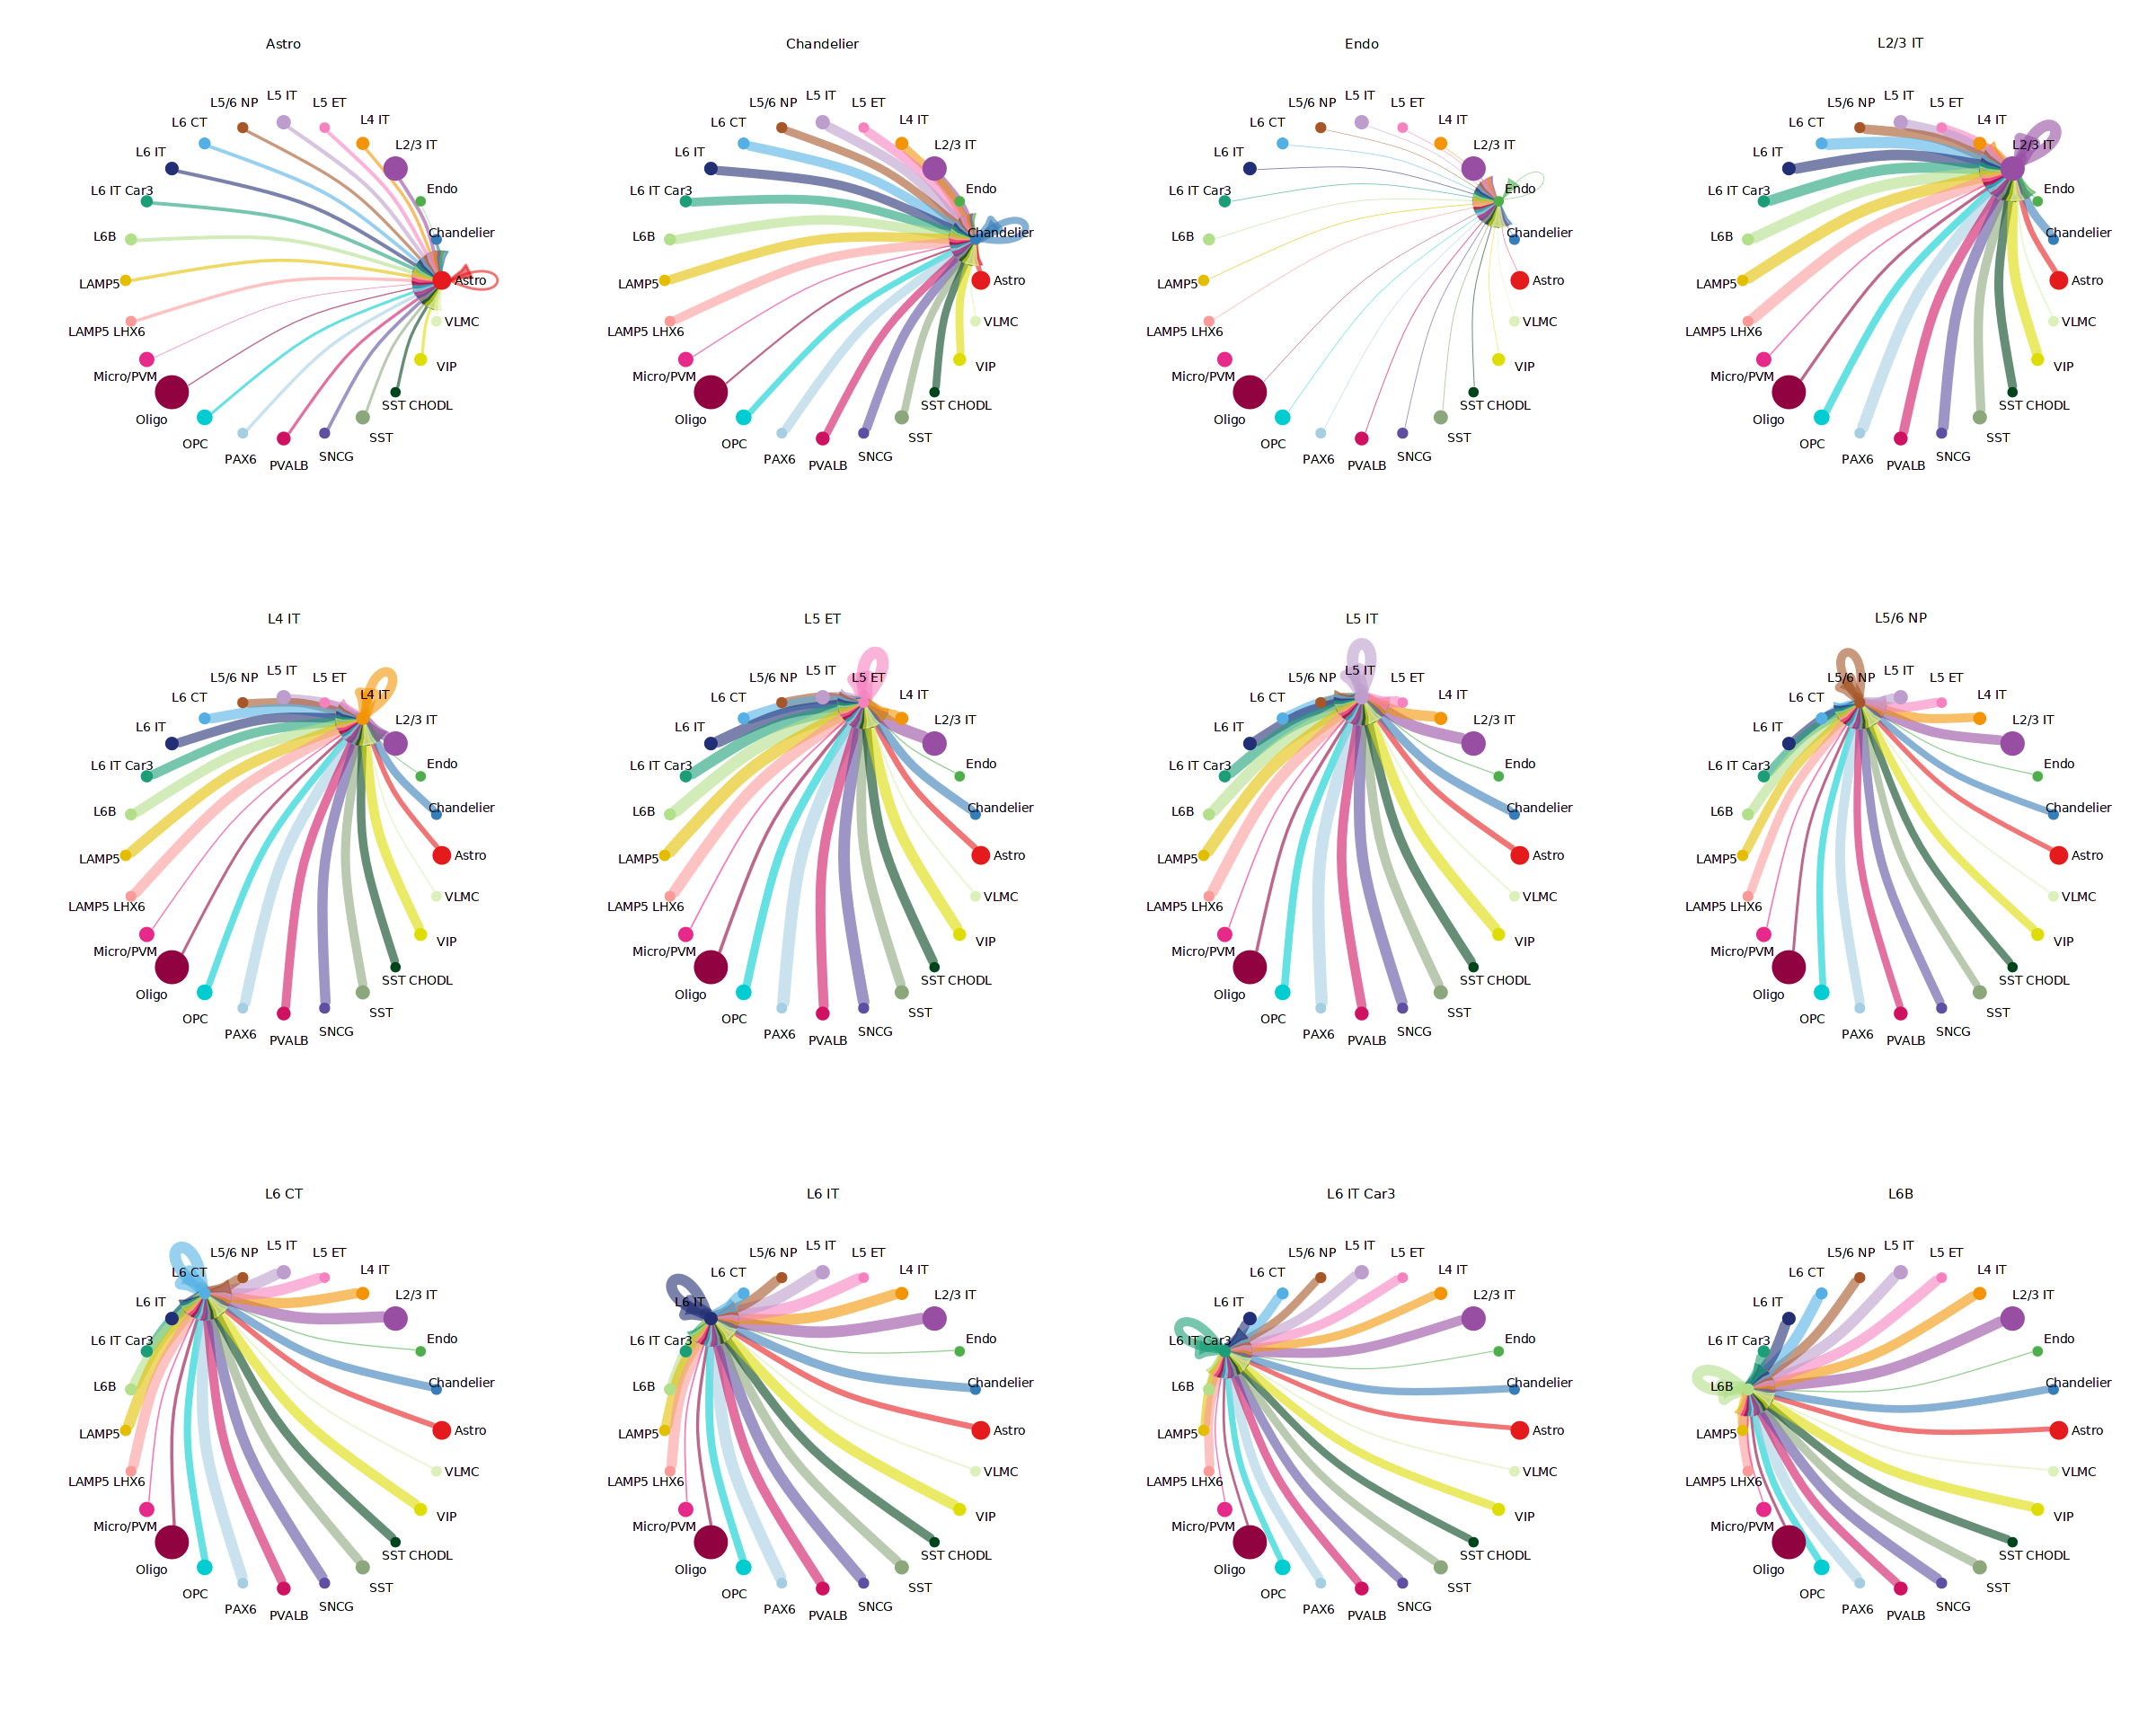

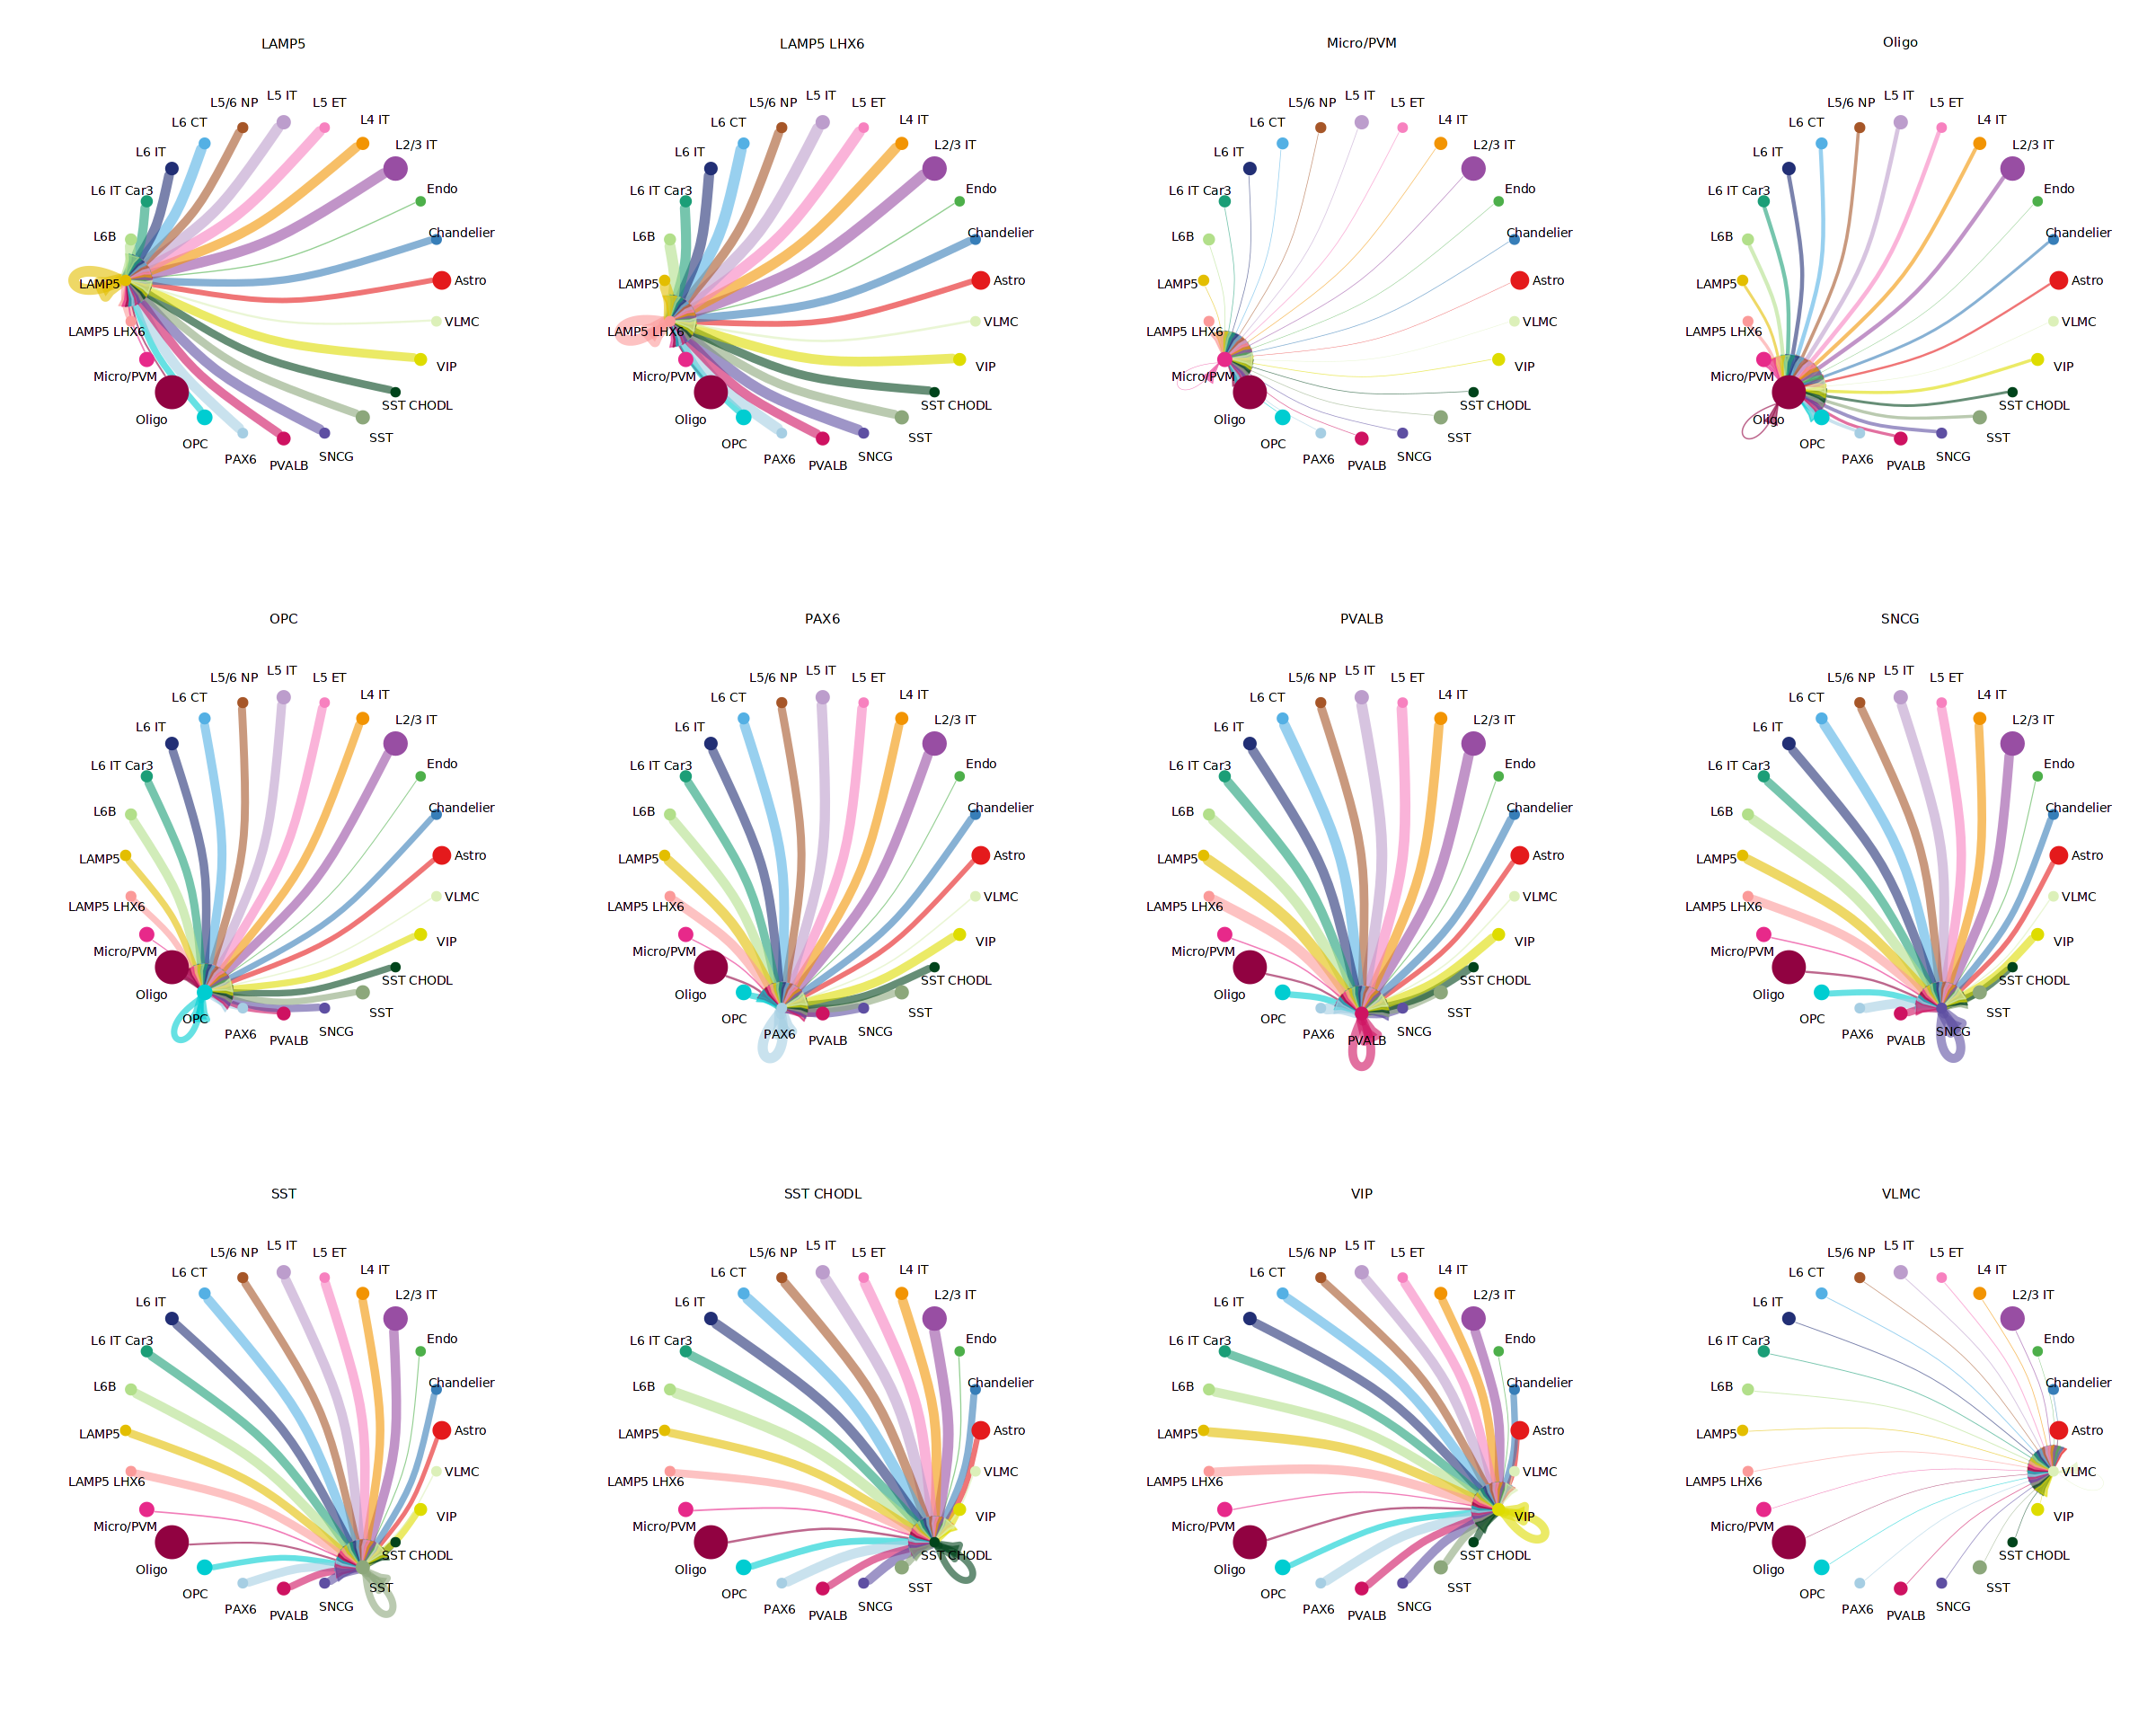

In [17]:
options(repr.plot.width = 20, repr.plot.height = 16)
group_size <- as.numeric(table(region_cc_object@idents))
mat <- region_cc_object@net$weight
par(mfrow = c(3,4), xpd = TRUE)
for (i in 1:ncol(mat)) {
    mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
    mat2[, i] <- mat[, i]
    netVisual_circle(
        mat2, 
        vertex.weight = group_size, 
        weight.scale = TRUE, 
        edge.weight.max = max(mat), 
        title.name = rownames(mat)[i]
    )
}

## Run all regions sequentially

In [4]:
CellChatDB <- CellChatDB.human

In [5]:
regions <- c("S1C", "V1C")
for (region_label in regions) {
    print(region_label)
    flush.console()
    
    dir_create(sprintf("%s/%s", result_dir, region_label))
    region_rna_count <- readRDS(sprintf("%s/%s.rds", data_source, region_label))
    region_rna_norm <- normalizeData(region_rna_count)
    region_meta <- meta_df[colnames(region_rna_norm), ]
    
    region_cc_object <- createCellChat(
        object = region_rna_norm,
        meta = region_meta,
        group.by = "Subclass_F"
    )
    region_cc_object@DB <- CellChatDB
    
    region_cc_object <- subsetData(region_cc_object)
    future::plan("multisession", workers = 4)
    region_cc_object <- identifyOverExpressedGenes(region_cc_object)
    region_cc_object <- identifyOverExpressedInteractions(region_cc_object)
    
    options(future.globals.maxSize = Inf)
    region_cc_object <- computeCommunProb(region_cc_object, type = "triMean")
    
    saveRDS(region_cc_object, sprintf("%s/%s/cc_object.rds", result_dir, region_label))
}

[1] "S1C"
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = region_rna_norm, meta = region_meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Astro, Chandelier, Endo, L2/3 IT, L4 IT, L5 ET, L5 IT, L5/6 NP, L6 CT, L6 IT, L6 IT Car3, L6B, LAMP5, LAMP5 LHX6, Micro/PVM, Oligo, OPC, PAX6, PVALB, SNCG, SST, SST CHODL, VIP, VLMC 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”


The number of highly variable ligand-receptor pairs used for signaling inference is 3197 
triMean is used for calculating the average gene expression per cell group. 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.1 GiB”


[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-11-10 16:49:20.841062]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-11-10 20:13:43.320795]"
[1] "V1C"
[1] "Create a CellChat object from a data matrix"


Warning message in createCellChat(object = region_rna_norm, meta = region_meta, :
“The 'meta' data does not have a column named `samples`. We now add this column and all cells are assumed to belong to `sample1`! 
”


Set cell identities for the new CellChat object 
The cell groups used for CellChat analysis are  Astro, Chandelier, Endo, L2/3 IT, L4 IT, L5 ET, L5 IT, L5/6 NP, L6 CT, L6 IT, L6 IT Car3, L6B, LAMP5, LAMP5 LHX6, Micro/PVM, Oligo, OPC, PAX6, PVALB, SNCG, SST, SST CHODL, VIP, VLMC 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.8 GiB”


The number of highly variable ligand-receptor pairs used for signaling inference is 3199 
triMean is used for calculating the average gene expression per cell group. 


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 1.8 GiB”


[1] ">>> Run CellChat on sc/snRNA-seq data <<< [2024-11-10 20:21:11.160971]"
[1] ">>> CellChat inference is done. Parameter values are stored in `object@options$parameter` <<< [2024-11-10 22:41:18.311514]"


## Overview of the communication pattern

In [4]:
figure_dir <- "/tscc/projects/ps-epigen/users/biy022/biccn/analysis/final_figures/"

In [5]:
region_order <- c("A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C")
cc_object_dir <- "cellchat_outputs/"
region_cc_objects <- vector(mode = "list", length = length(region_order))
names(region_cc_objects) <- region_order
for (region in region_order) {
    region_cc_objects[[region]] <- readRDS(sprintf("%s/%s/cc_object.rds", cc_object_dir, region))
    region_cc_objects[[region]] <- aggregateNet(region_cc_objects[[region]])
}

In [6]:
region_nbr_cells <- vector(mode = "list", length = length(region_order)) 
for (region in region_order) {
    region_nbr_cells[[region]] <- ncol(region_cc_objects[[region]]@data)
}

In [7]:
options(repr.plot.width = 12, repr.plot.height = 12)
png(filename = sprintf("%s/Astro-cellchat-overview.png", figure_dir), width = 1000, height = 1000, bg = "transparent")
par(mfrow = c(3,3), xpd = TRUE)
max_scale <- 0
for (region in region_order) {
    
    region_cc_object <- region_cc_objects[[region]]
    mat <- region_cc_object@net$weight
    
    mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
    mat2[, 5] <- mat[, 5]
    max_scale <- max(max_scale, max(mat2))
}
for (region in region_order) {
    
    region_cc_object <- region_cc_objects[[region]]
    group_size <- as.numeric(table(region_cc_object@idents))
    mat <- region_cc_object@net$weight
    
    mat2 <- matrix(0, nrow = nrow(mat), ncol = ncol(mat), dimnames = dimnames(mat))
    mat2[, "Astro"] <- mat[, "Astro"]
    netVisual_circle(
        mat2, 
        vertex.weight = group_size, 
        weight.scale = TRUE, 
        edge.weight.max = max_scale, 
        title.name = region
    )
}
dev.off()

png 
  2

In [8]:
total_stats <- data.frame(
    region = factor(region_order, levels = region_order),
    ncell = unlist(region_nbr_cells),
    weight = 0.0,
    count = 0
)
rownames(total_stats) <- region_order
for (region in region_order) {
    total_stats[region, "count"] <- sum(region_cc_objects[[region]]@net$count)
    total_stats[region, "weight"] <- sum(region_cc_objects[[region]]@net$weight)
}

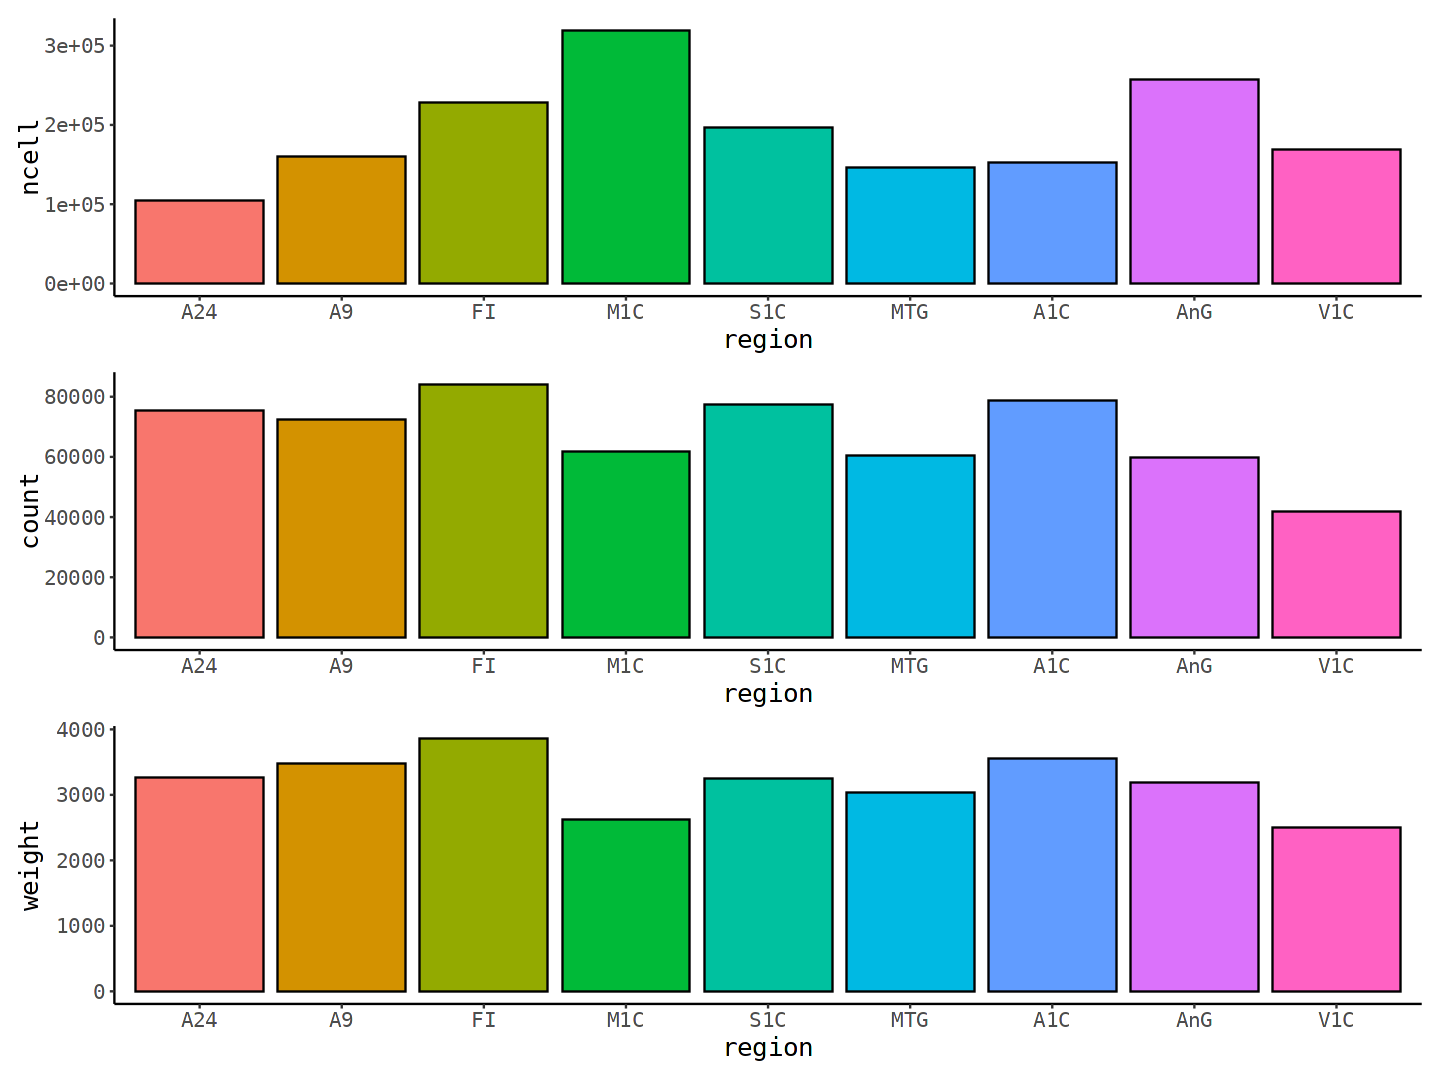

In [9]:
options(repr.plot.width = 12, repr.plot.height = 9)
p1 <- ggplot(total_stats, aes(x = region, y = ncell, fill = region)) +
    geom_bar(stat = "identity", color = "black") +
    theme_classic(base_family = "mono") +
    theme(
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        legend.position = "none"
    )
p2 <- ggplot(total_stats, aes(x = region, y = count, fill = region)) +
    geom_bar(stat = "identity", color = "black") +
    theme_classic(base_family = "mono") +
    theme(
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        legend.position = "none"
    )
p3 <- ggplot(total_stats, aes(x = region, y = weight, fill = region)) +
    geom_bar(stat = "identity", color = "black") +
    theme_classic(base_family = "mono") +
    theme(
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        axis.text.x = element_text(size = 12),
        axis.text.y = element_text(size = 12),
        legend.position = "none"
    )
p <- p1 / p2 / p3
p
ggsave(
    sprintf("%s/cellchat_overview.png", figure_dir), 
    plot = p, 
    dpi = 300, 
    width = 12, 
    height = 9, 
    device = "png"
)

In [6]:
region_order <- c("A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C")
subclass_order <- c(
    "L2/3 IT", "L4 IT", "L5 IT", "L6 IT", "L6 IT Car3", "L6 CT", "L5 ET", "L5/6 NP", "L6B",
    "PVALB", "LAMP5", "LAMP5 LHX6", "PAX6", "SNCG", "VIP", "SST", "SST CHODL", "Chandelier",
    "Oligo", "Astro", "Micro/PVM", "OPC", "Endo", "VLMC"
)

In [7]:
subclass_name <- "L4 IT"
subclass_label <- "L4_IT"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / ccc
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

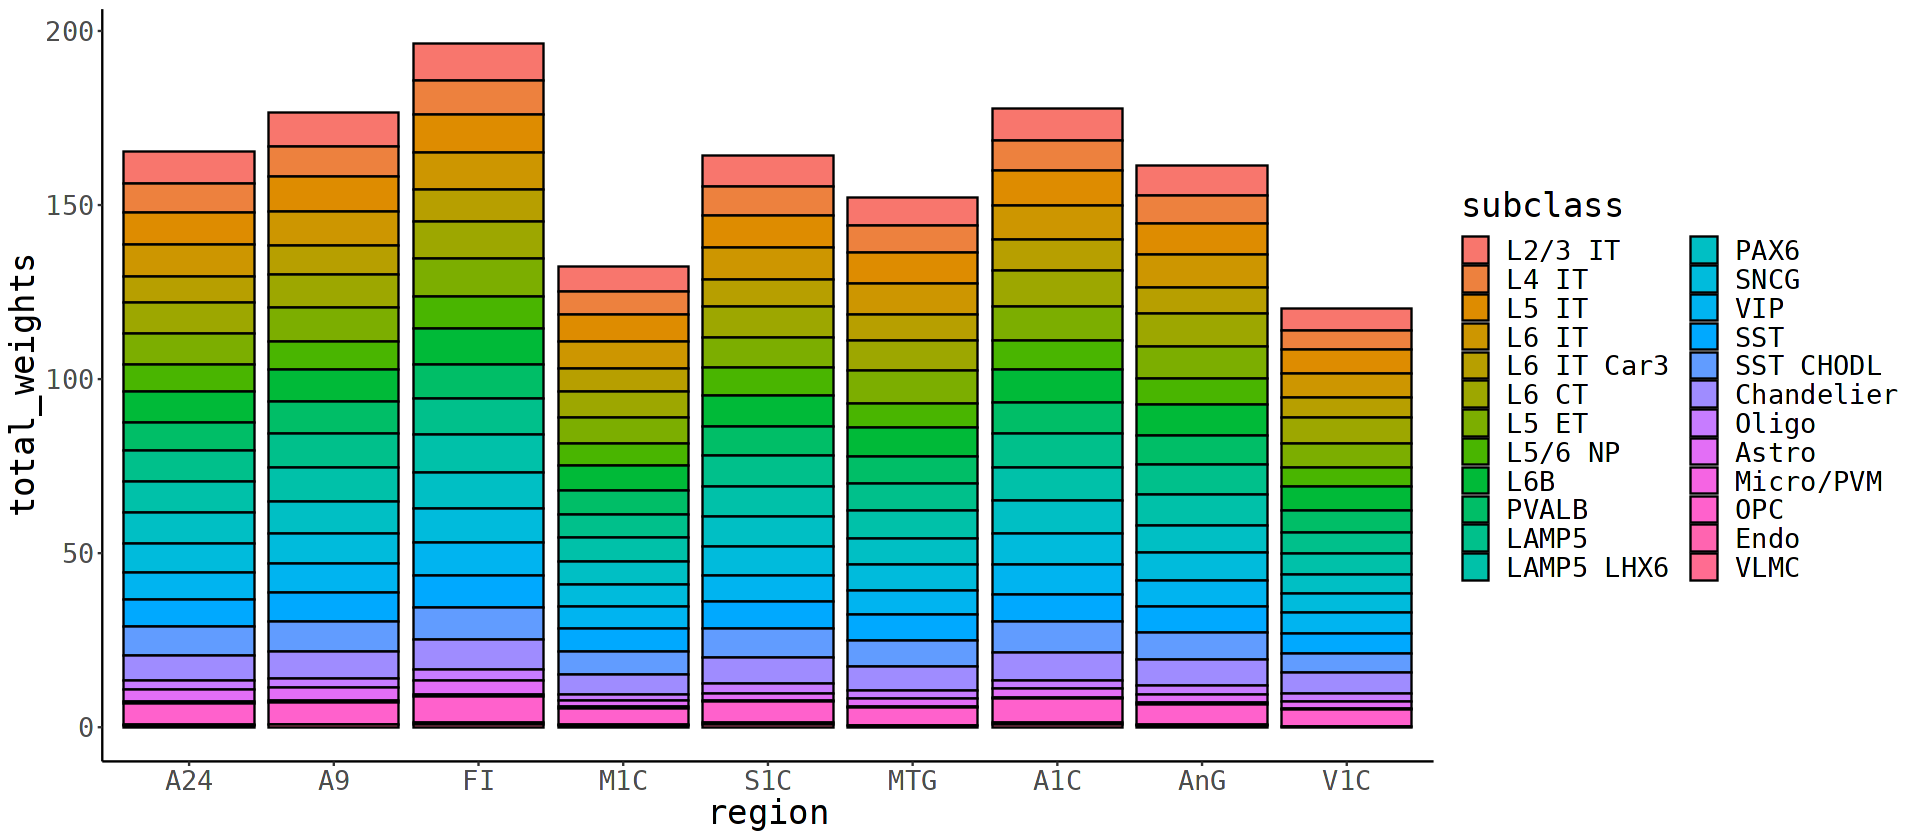

In [10]:
options(repr.plot.width = 16, repr.plot_height = 5)
ggplot(result_df, aes(x = region, fill = subclass, y = total_weights)) +
geom_bar(stat = "identity", color = "black") +
theme_classic() +
theme(
    text = element_text(family = "mono", size = 20)
)

In [8]:
library(RColorBrewer)
coolwarm_colors <- colorRampPalette(c("blue", "white", "red"))

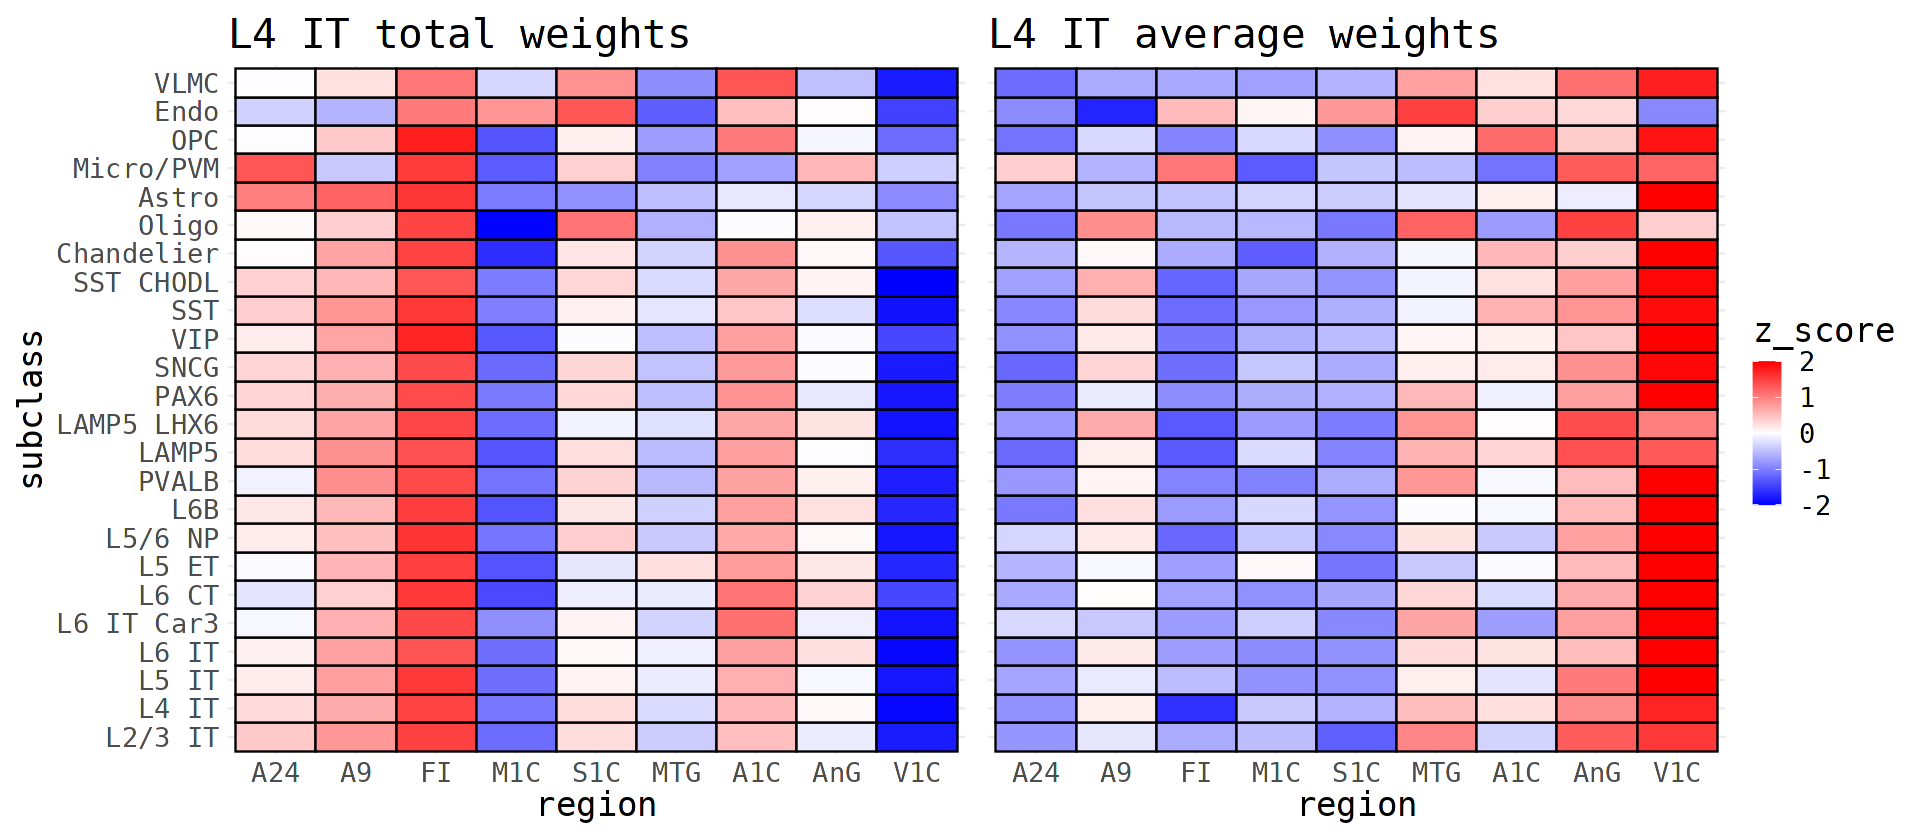

In [9]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [10]:
subclass_name <- "L2/3 IT"
subclass_label <- "L2_3_IT"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / ccc
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

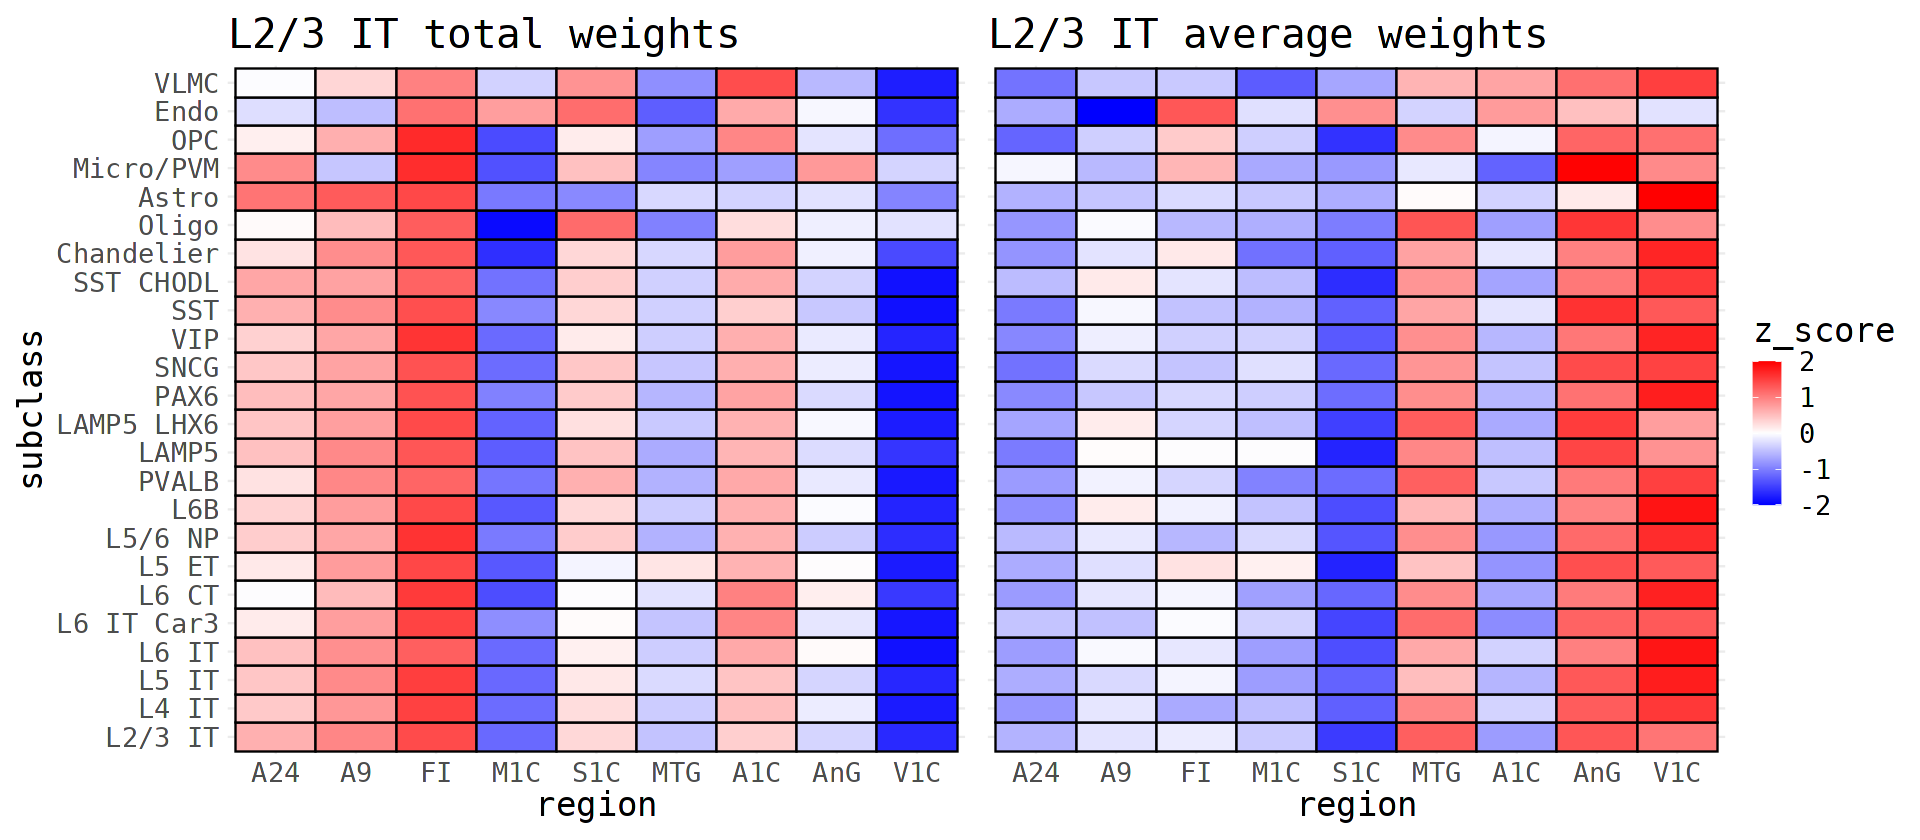

In [11]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [12]:
subclass_name <- "L5 IT"
subclass_label <- "L5_IT"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / ccc
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

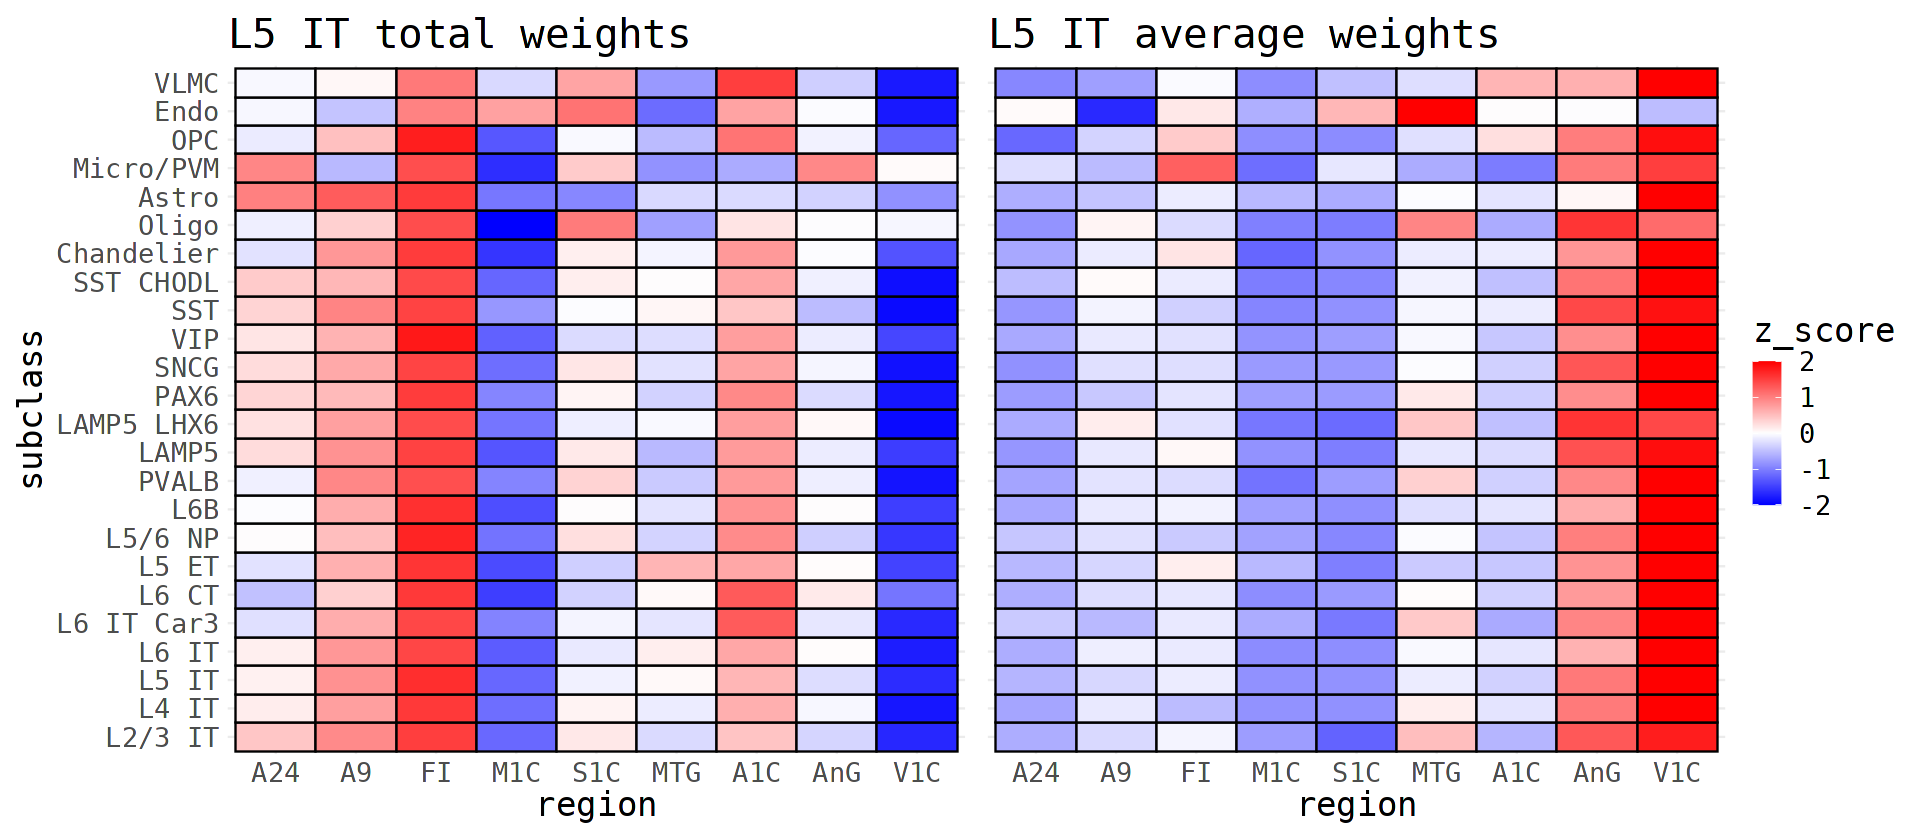

In [13]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [14]:
subclass_name <- "Astro"
subclass_label <- "Astro"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / ccc
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

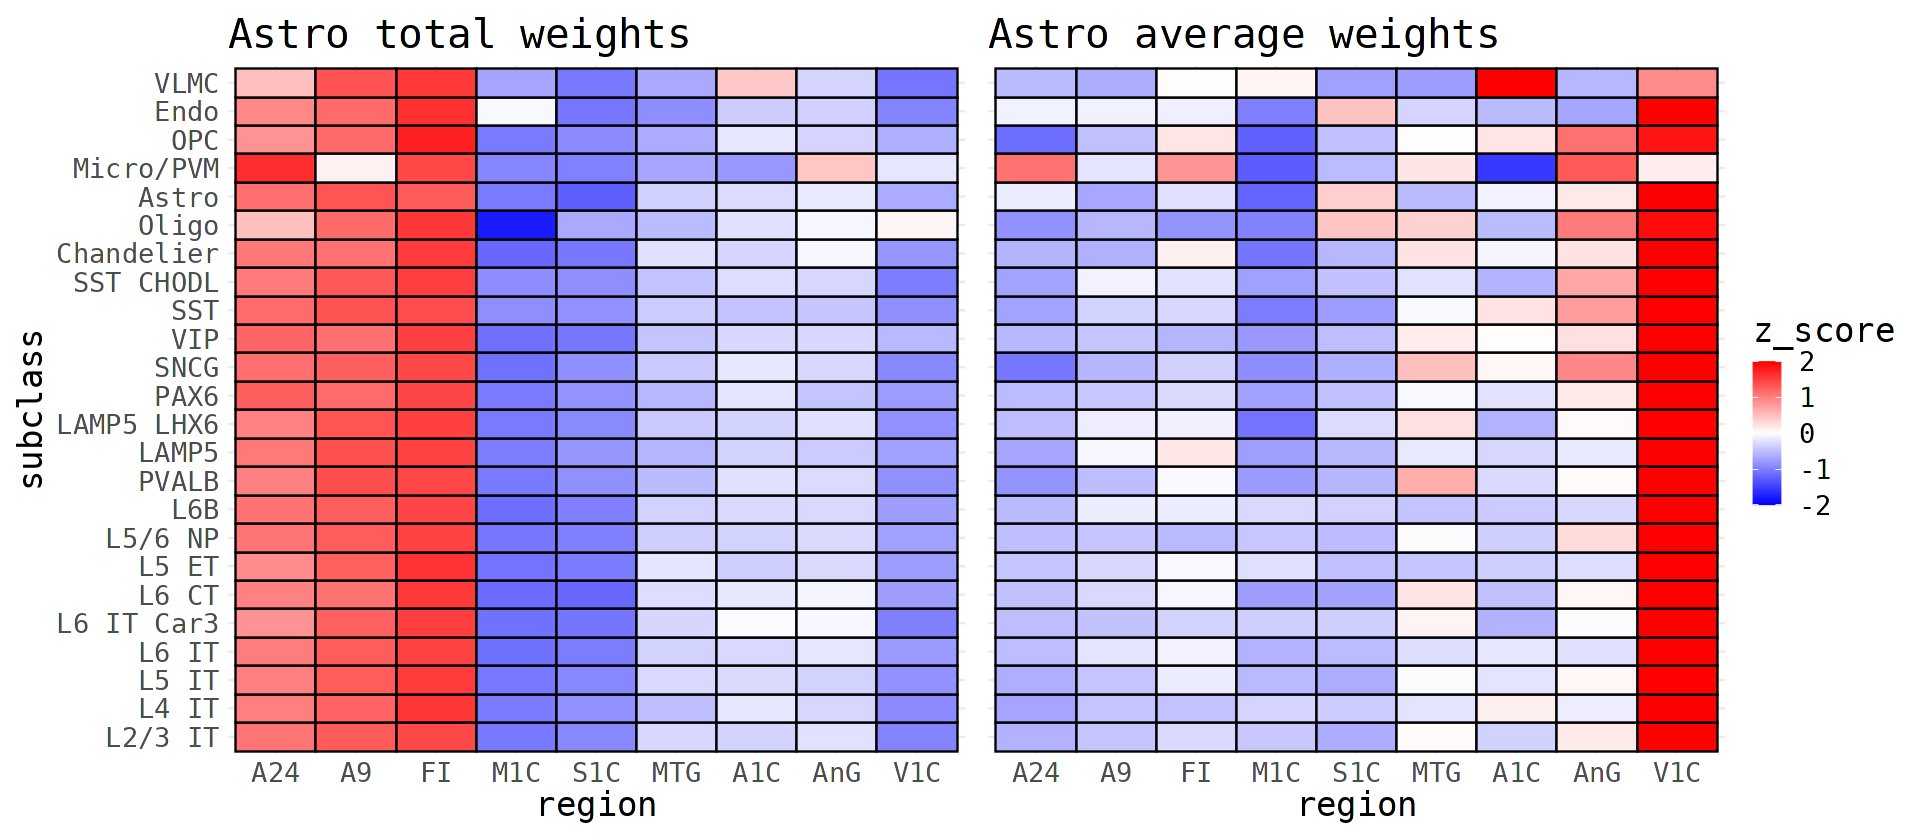

In [15]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [18]:
subclass_name <- "Oligo"
subclass_label <- "Oligo"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / (ccc + 1e-6)
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

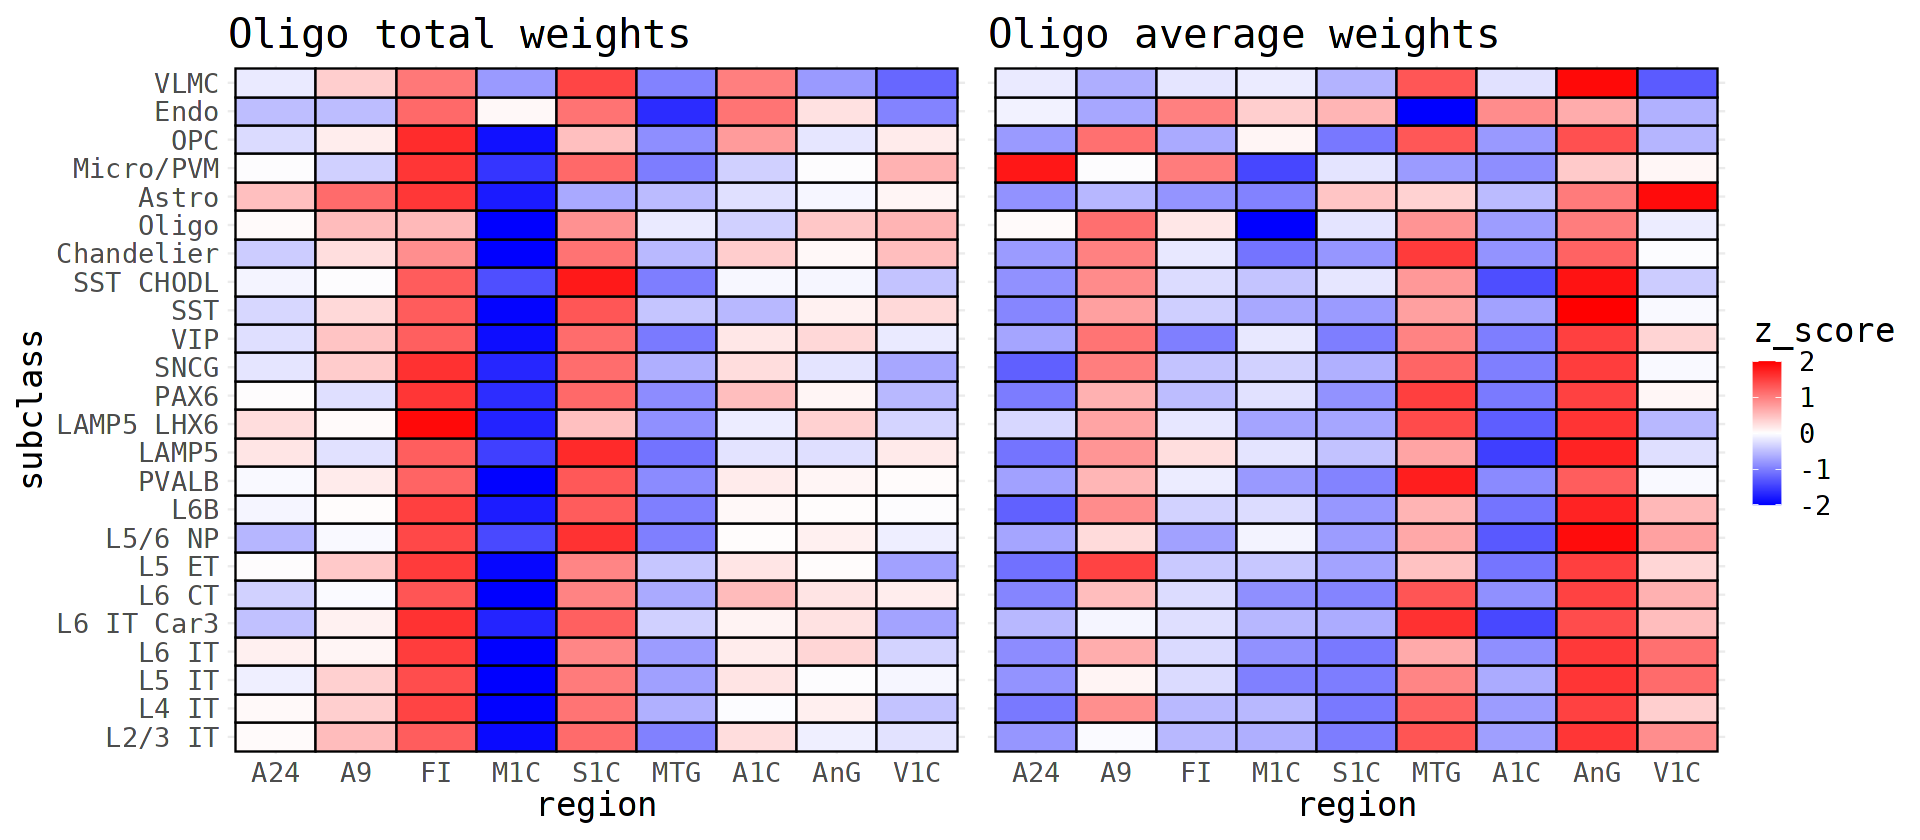

In [19]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [21]:
subclass_name <- "L6 IT"
subclass_label <- "L6_IT"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / (ccc + 1e-6)
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

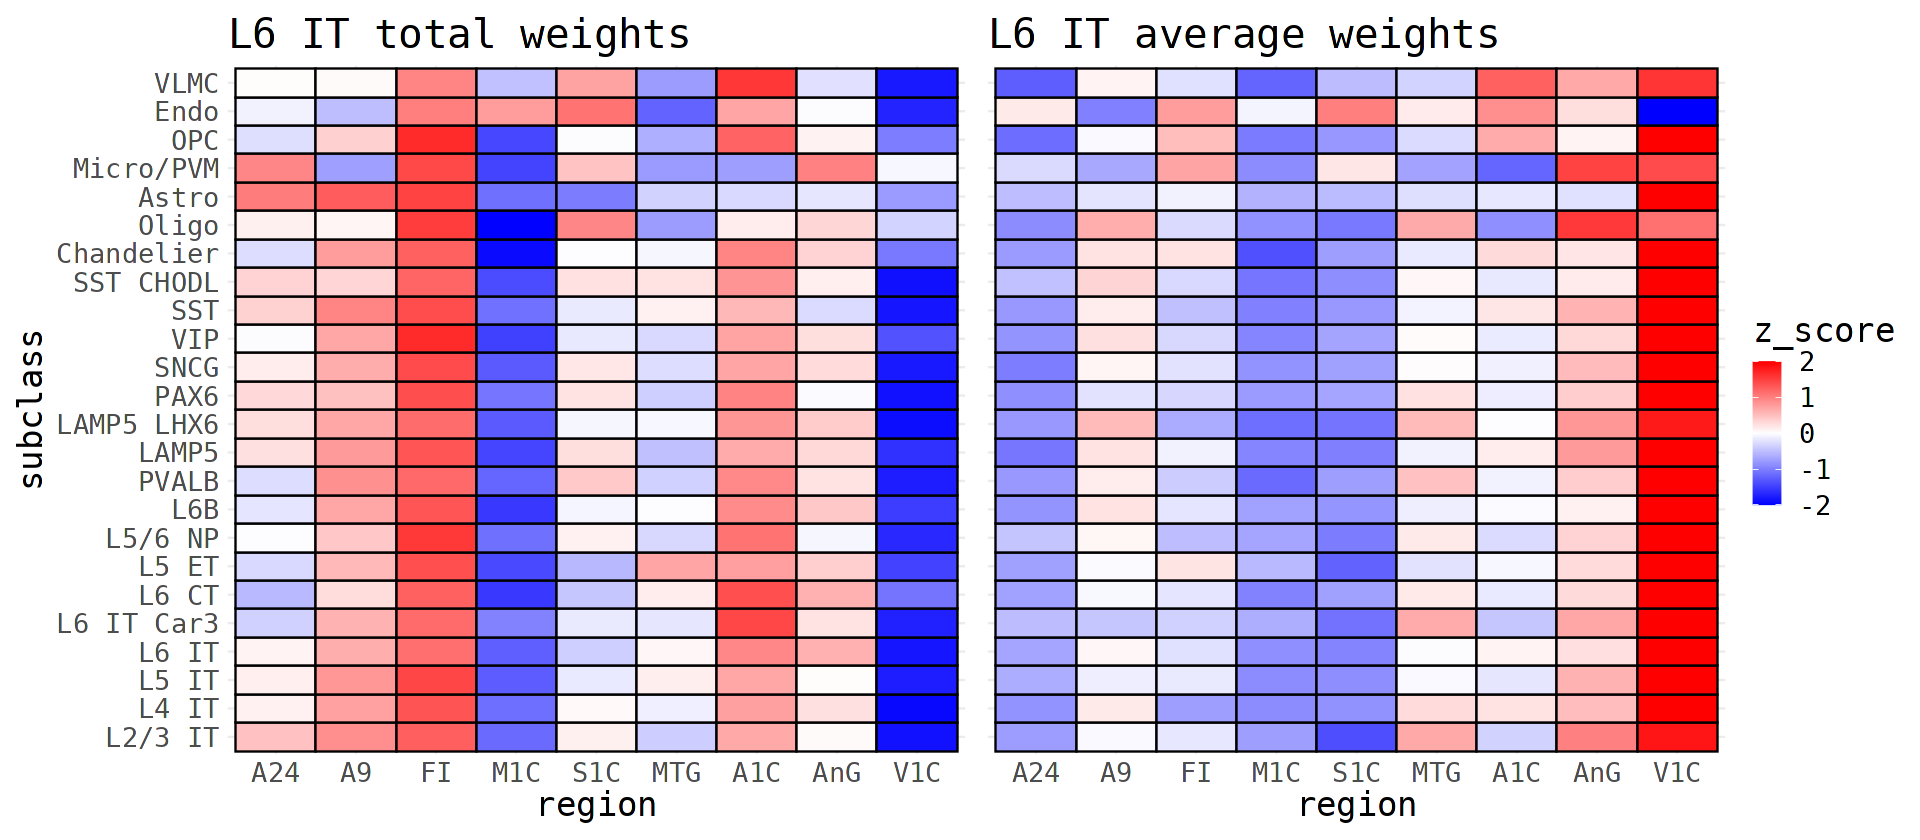

In [22]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [23]:
subclass_name <- "PVALB"
subclass_label <- "PVALB"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / (ccc + 1e-6)
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

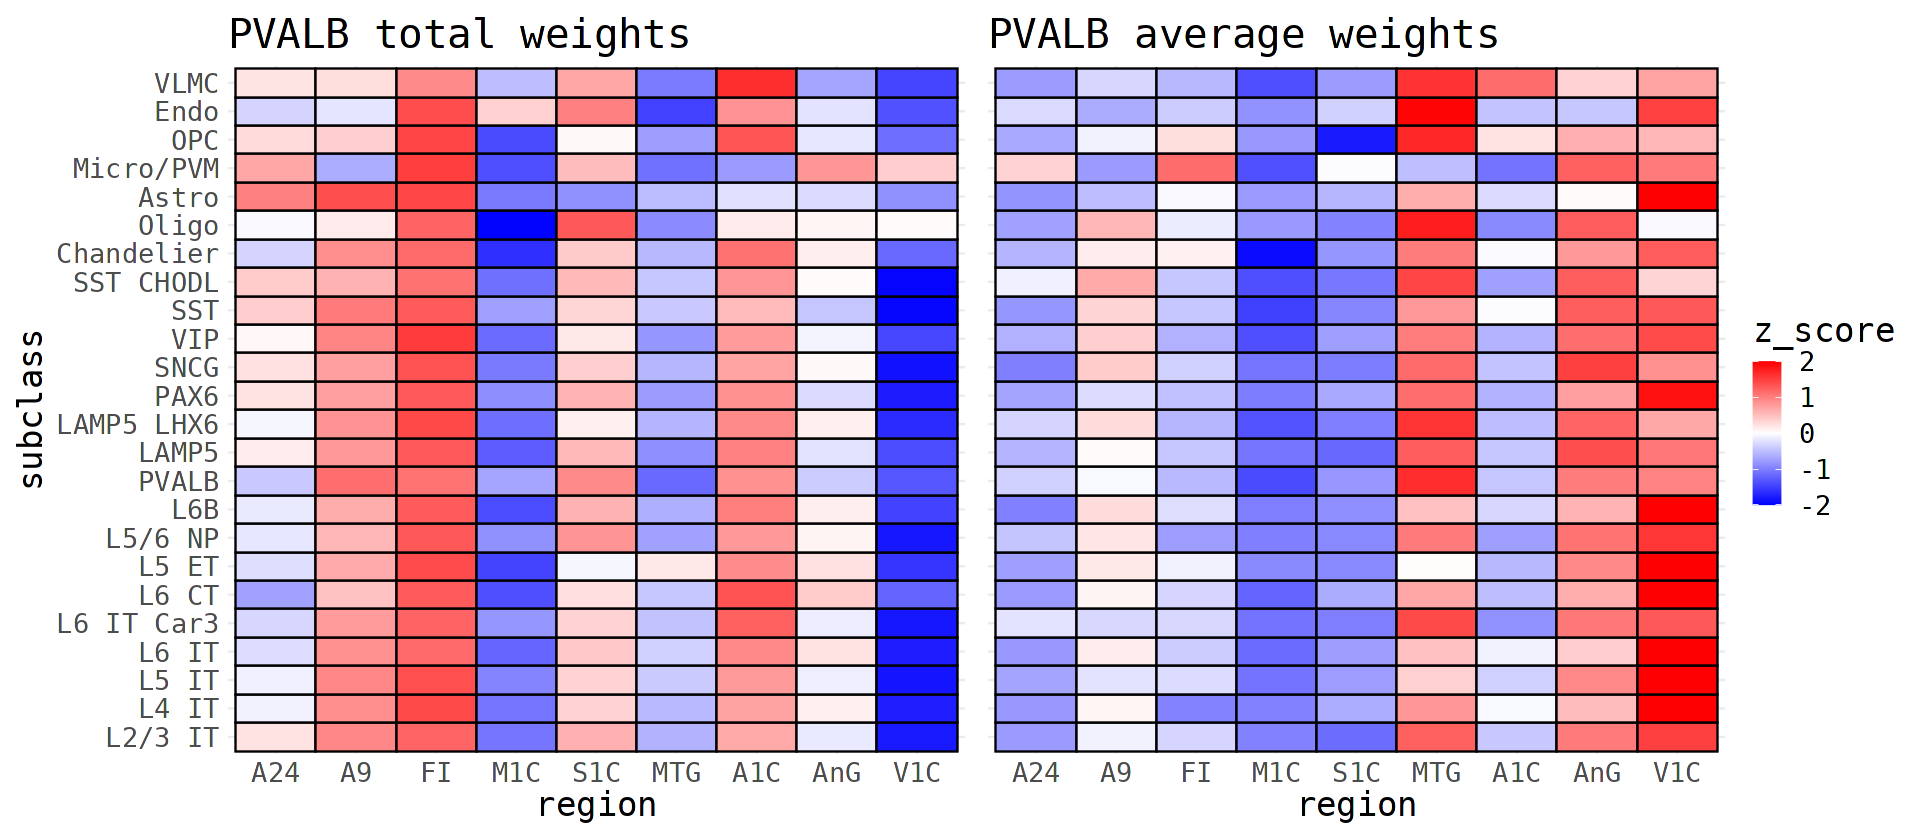

In [24]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [26]:
subclass_name <- "Micro/PVM"
subclass_label <- "Micro"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / (ccc + 1e-6)
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

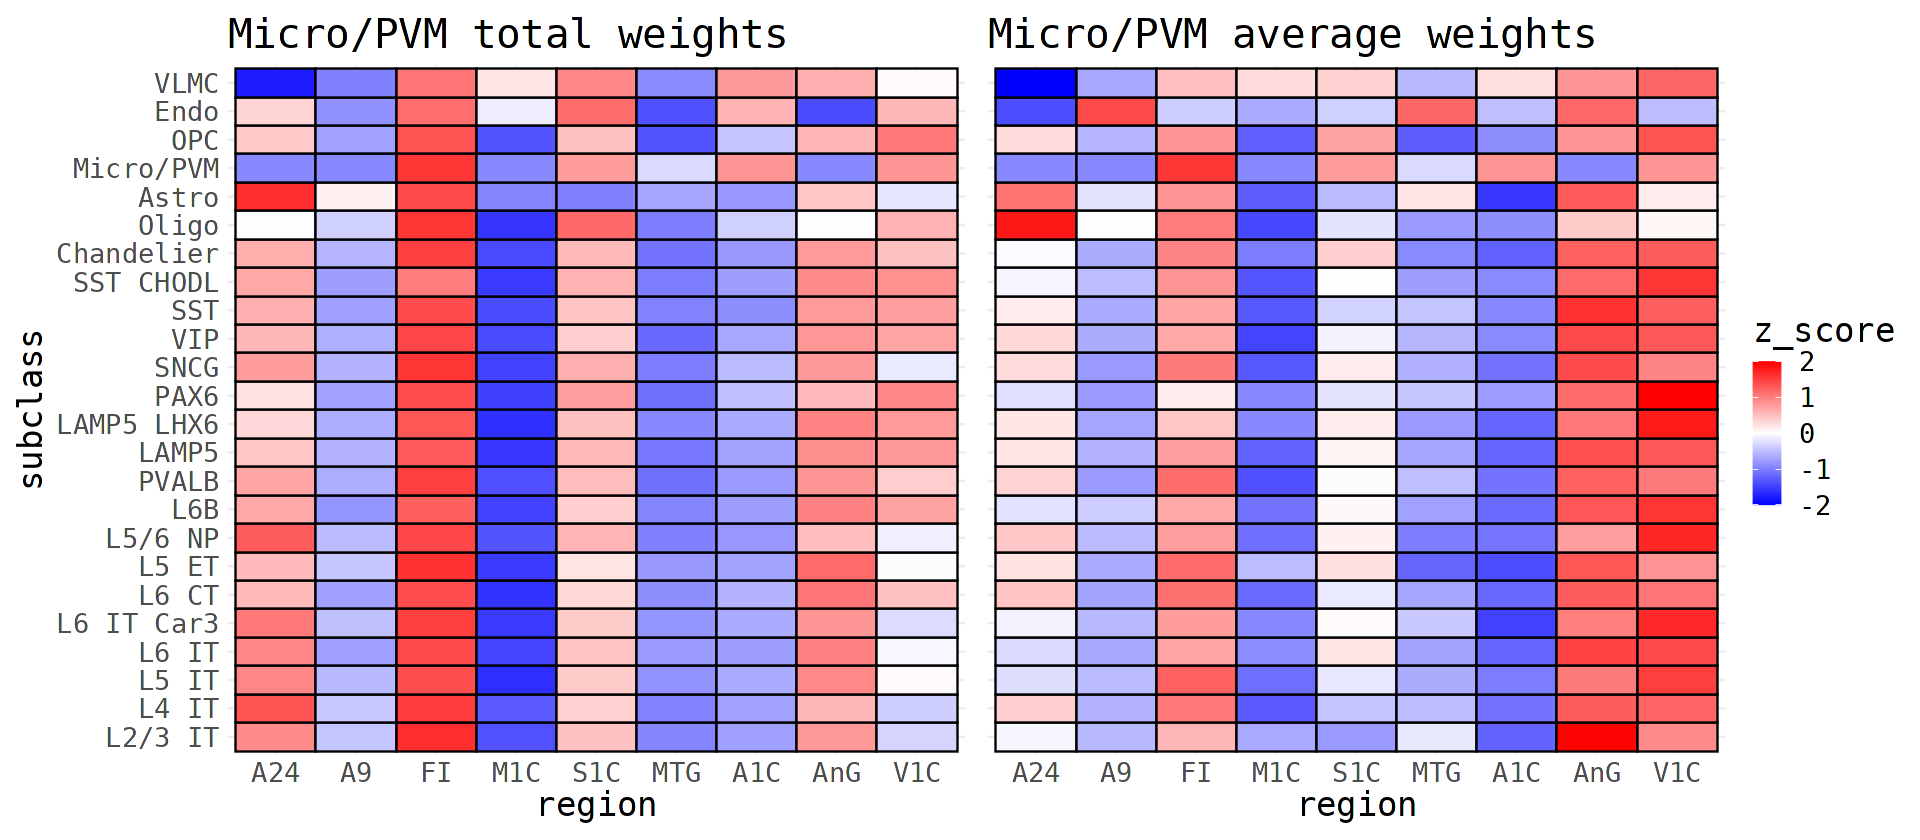

In [27]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

In [28]:
subclass_name <- "SST"
subclass_label <- "SST"
result_df <- data.frame(
    total_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    avg_weights = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        ccc <- (mat@net$count[subclass, subclass_name] + mat@net$count[subclass_name, subclass]) / 2.0
        cct <- (mat@net$weight[subclass, subclass_name] + mat@net$weight[subclass_name, subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_weights"] <- cct
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "avg_weights"] <- cct / (ccc + 1e-6)
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

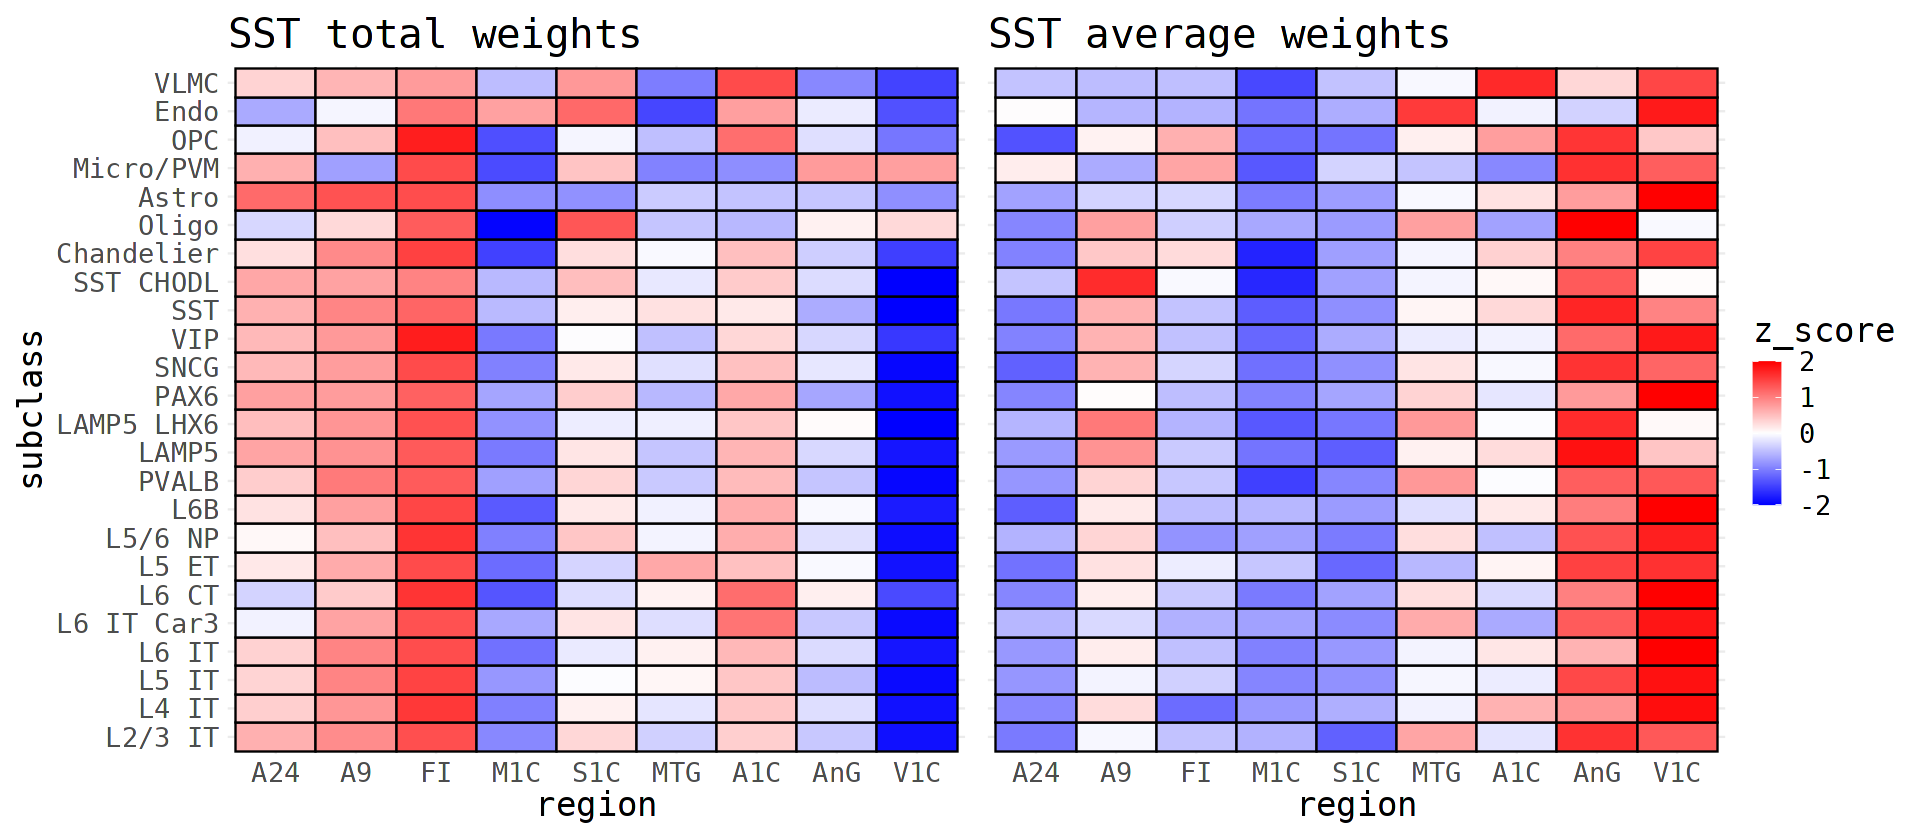

In [29]:
options(repr.plot.width = 16, repr.plot_height = 16)
plot1 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (total_weights - mean(total_weights)) / sd(total_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20)
) +
labs(title = sprintf("%s total weights", subclass_name))

plot2 <- result_df %>%
dplyr::group_by(subclass) %>%
dplyr::mutate(z_score = (avg_weights - mean(avg_weights)) / sd(avg_weights)) %>%
dplyr::ungroup() %>%
ggplot(aes(x = region, y = subclass, fill = z_score)) +
geom_tile(color = "black", linewidth = 0.5) +
scale_fill_gradientn(colors = coolwarm_colors(100), limits = c(-2, 2), oob = scales::squish) +
theme_minimal() +
theme(
    text = element_text(family = "mono", size = 20),
    axis.title.y = element_blank(), 
    axis.text.y = element_blank(), 
    axis.ticks.y = element_blank()
) +
labs(title = sprintf("%s average weights", subclass_name))

combined_plot <- plot1 + plot2 + plot_layout(guides = "collect") & theme(legend.position = "right")
print(combined_plot)
ggsave(
    plot = combined_plot, 
    file = sprintf("%s/%s-cellchat-weights.pdf", figure_dir, subclass_label), 
    device = "pdf", 
    dpi = 300, 
    width = 16, 
    height = 10
)

## Individual interactions

In [13]:
region_lr_tables <- vector(mode = "list", length = length(region_order))
names(region_lr_tables) <- region_order
union_index_set <- c()
for (region in region_order) {
    region_lr_tables[[region]] <- subsetCommunication(region_cc_objects[[region]])
    region_lr_tables[[region]]$index <- paste(
        region_lr_tables[[region]]$source,
        region_lr_tables[[region]]$target,
        region_lr_tables[[region]]$interaction_name,
        sep = "-"
    )
    rownames(region_lr_tables[[region]]) <- region_lr_tables[[region]]$index
    union_index_set <- union(union_index_set, rownames(region_lr_tables[[region]]))
}

In [20]:
region_lr_tables_expanded <- vector(mode = "list", length = length(region_order))
names(region_lr_tables_expanded) <- region_order
union_index_set <- sort(union_index_set)
for (region in region_order) {
    region_lr_tables_expanded[[region]] <- data.frame(
        matrix(NA, nrow = length(union_index_set), ncol = ncol(region_lr_tables[[region]]))
    )
    rownames(region_lr_tables_expanded[[region]]) <- union_index_set
    colnames(region_lr_tables_expanded[[region]]) <- colnames(region_lr_tables[[region]])
    region_lr_tables_expanded[[region]][rownames(region_lr_tables[[region]]), ] <- region_lr_tables[[region]]
}

In [21]:
combined_lr_table_expanded <- do.call(cbind, lapply(region_lr_tables_expanded, function(x) {x$prob}))
colnames(combined_lr_table_expanded) <- names(region_lr_tables_expanded)
rownames(combined_lr_table_expanded) <- union_index_set

In [22]:
subclass_of_interest <- "L4 IT"
subclass_lr_table_expanded <- combined_lr_table_expanded[
    sapply(strsplit(rownames(combined_lr_table_expanded), "-"), `[`, 1) == subclass_of_interest |
    sapply(strsplit(rownames(combined_lr_table_expanded), "-"), `[`, 2) == subclass_of_interest, 
]
subclass_lr_table_expanded[is.na(subclass_lr_table_expanded)] <- 0

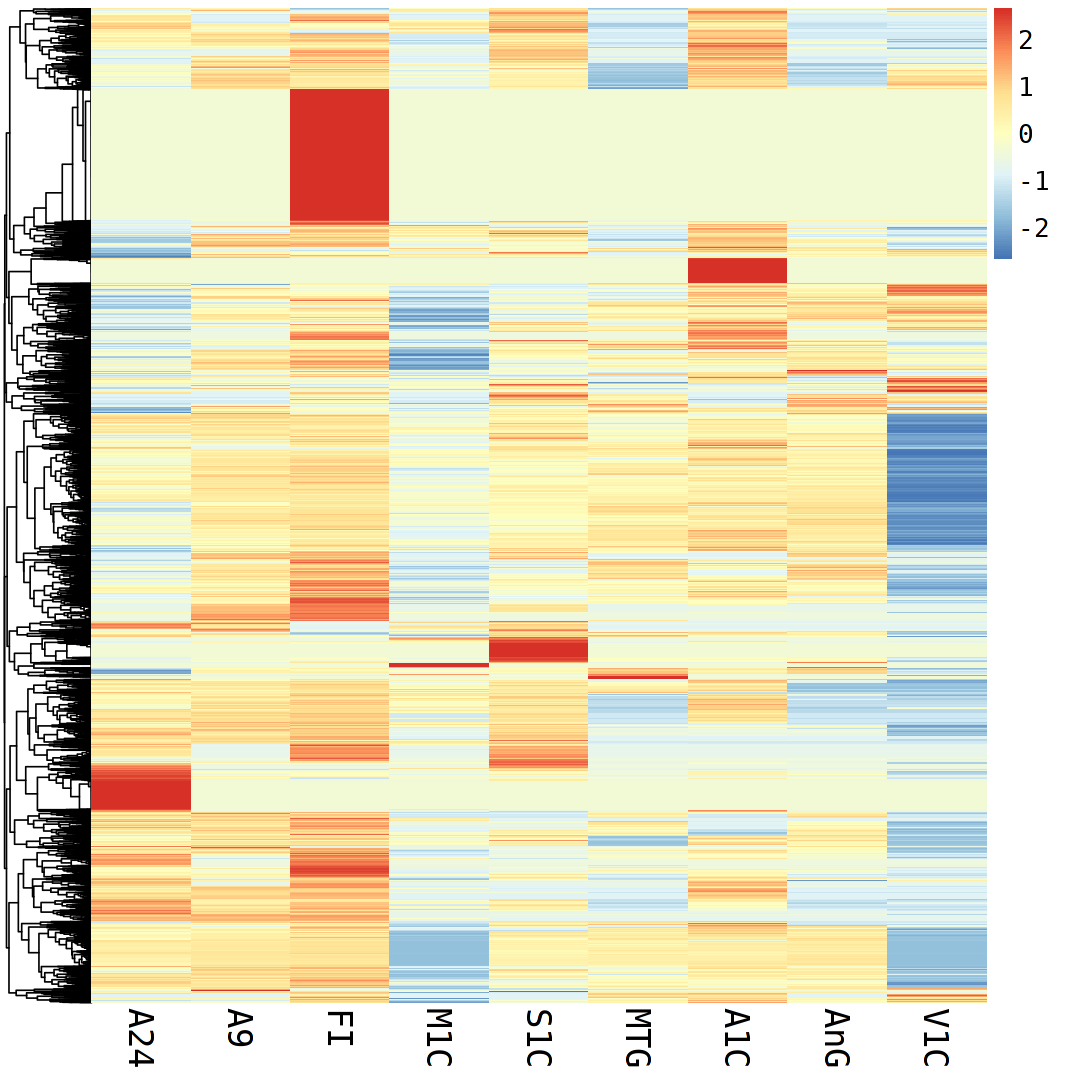

In [23]:
options(repr.plot.width = 9, repr.plot.height = 9)
pheatmap(
    subclass_lr_table_expanded, 
    show_rownames = FALSE,
    scale = "row",
    cluster_cols = FALSE,
    fontsize = 15,
    fontsize_col = 20,
    fontfamily = "mono",
    # breaks = seq(0.0, 0.2, length.out = 100)
)

In [24]:
column_index <- 1:ncol(subclass_lr_table_expanded)
cor_results <- apply(subclass_lr_table_expanded, 1, function(row) {
    test <- cor.test(row, column_index, method = "spearman")
    c(correlation = test$estimate, p_value = test$p.value)
})
cor_results <- t(cor_results)
cor_results <- as.data.frame(cor_results)
cor_results$p_adjusted <- p.adjust(cor_results$p_value)

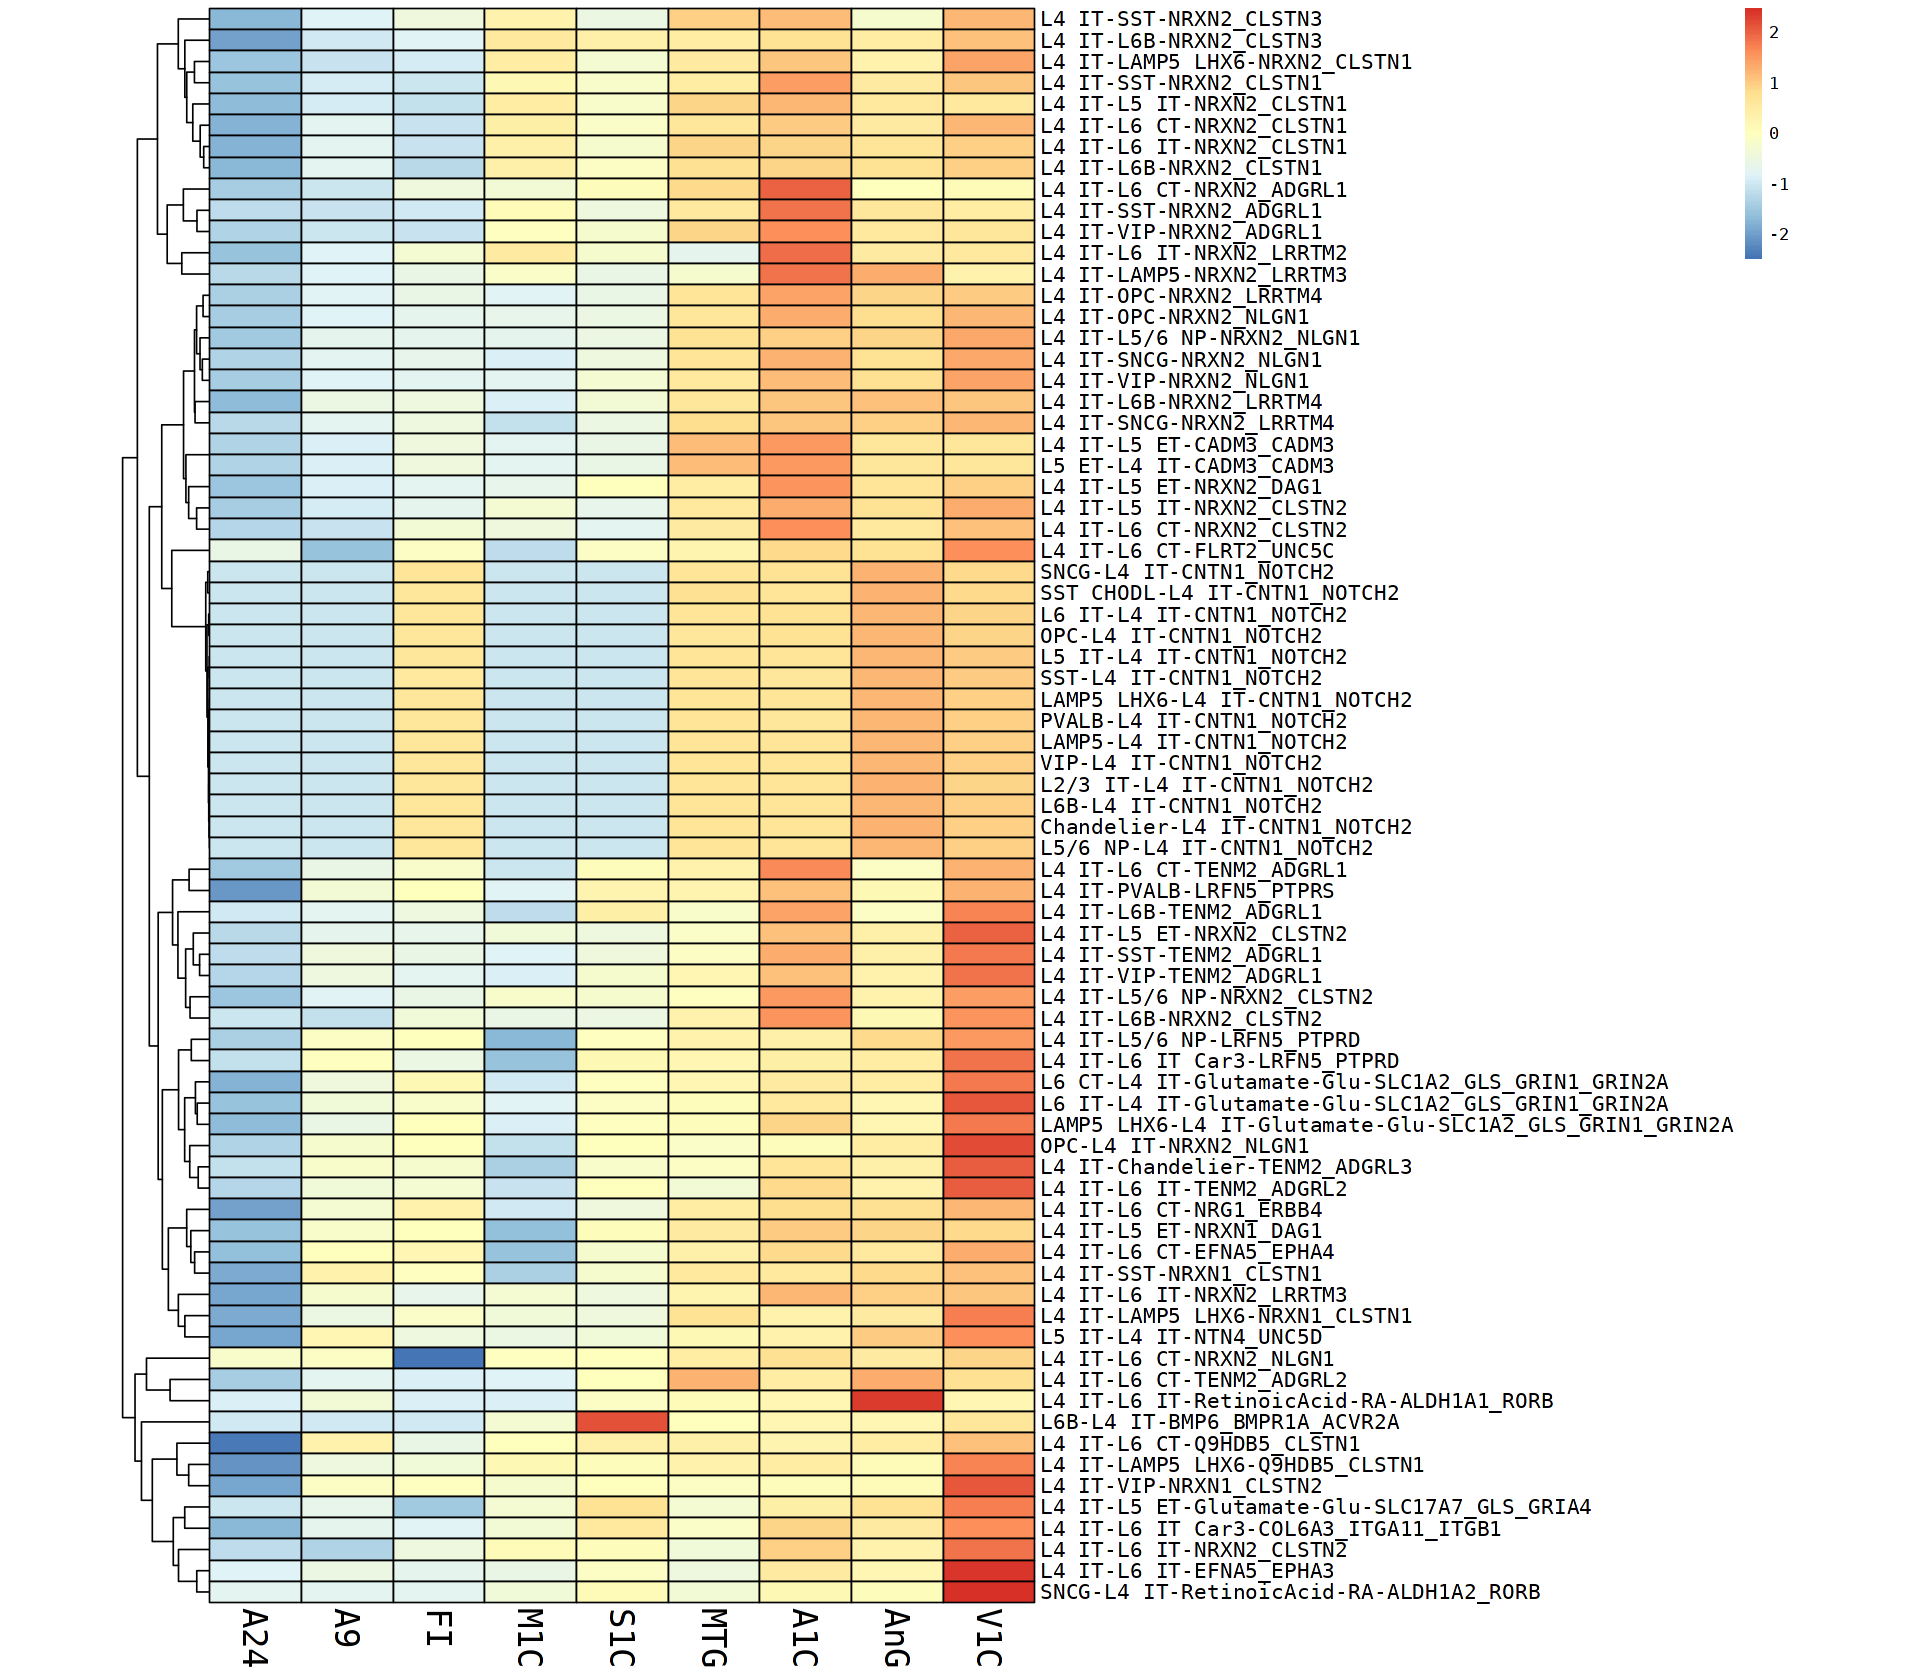

In [34]:
options(repr.plot.width = 16, repr.plot.height = 14)
p <- pheatmap(
    subclass_lr_table_expanded[rownames(cor_results[cor_results$correlation.rho > 0.8, ]), ],
    cluster_col = FALSE,
    scale = "row",
    border_color = "black",
    fontfamily = "mono",
    fontsize_row = 12.5,
    fontsize_col = 20,
    cellwidth = 55
)
ggsave(
    filename = sprintf("%s/L4_IT-cellchat-top.png", figure_dir), 
    plot = p, 
    dpi = 300, 
    height = 14, 
    width = 16, 
    device = "png"
)

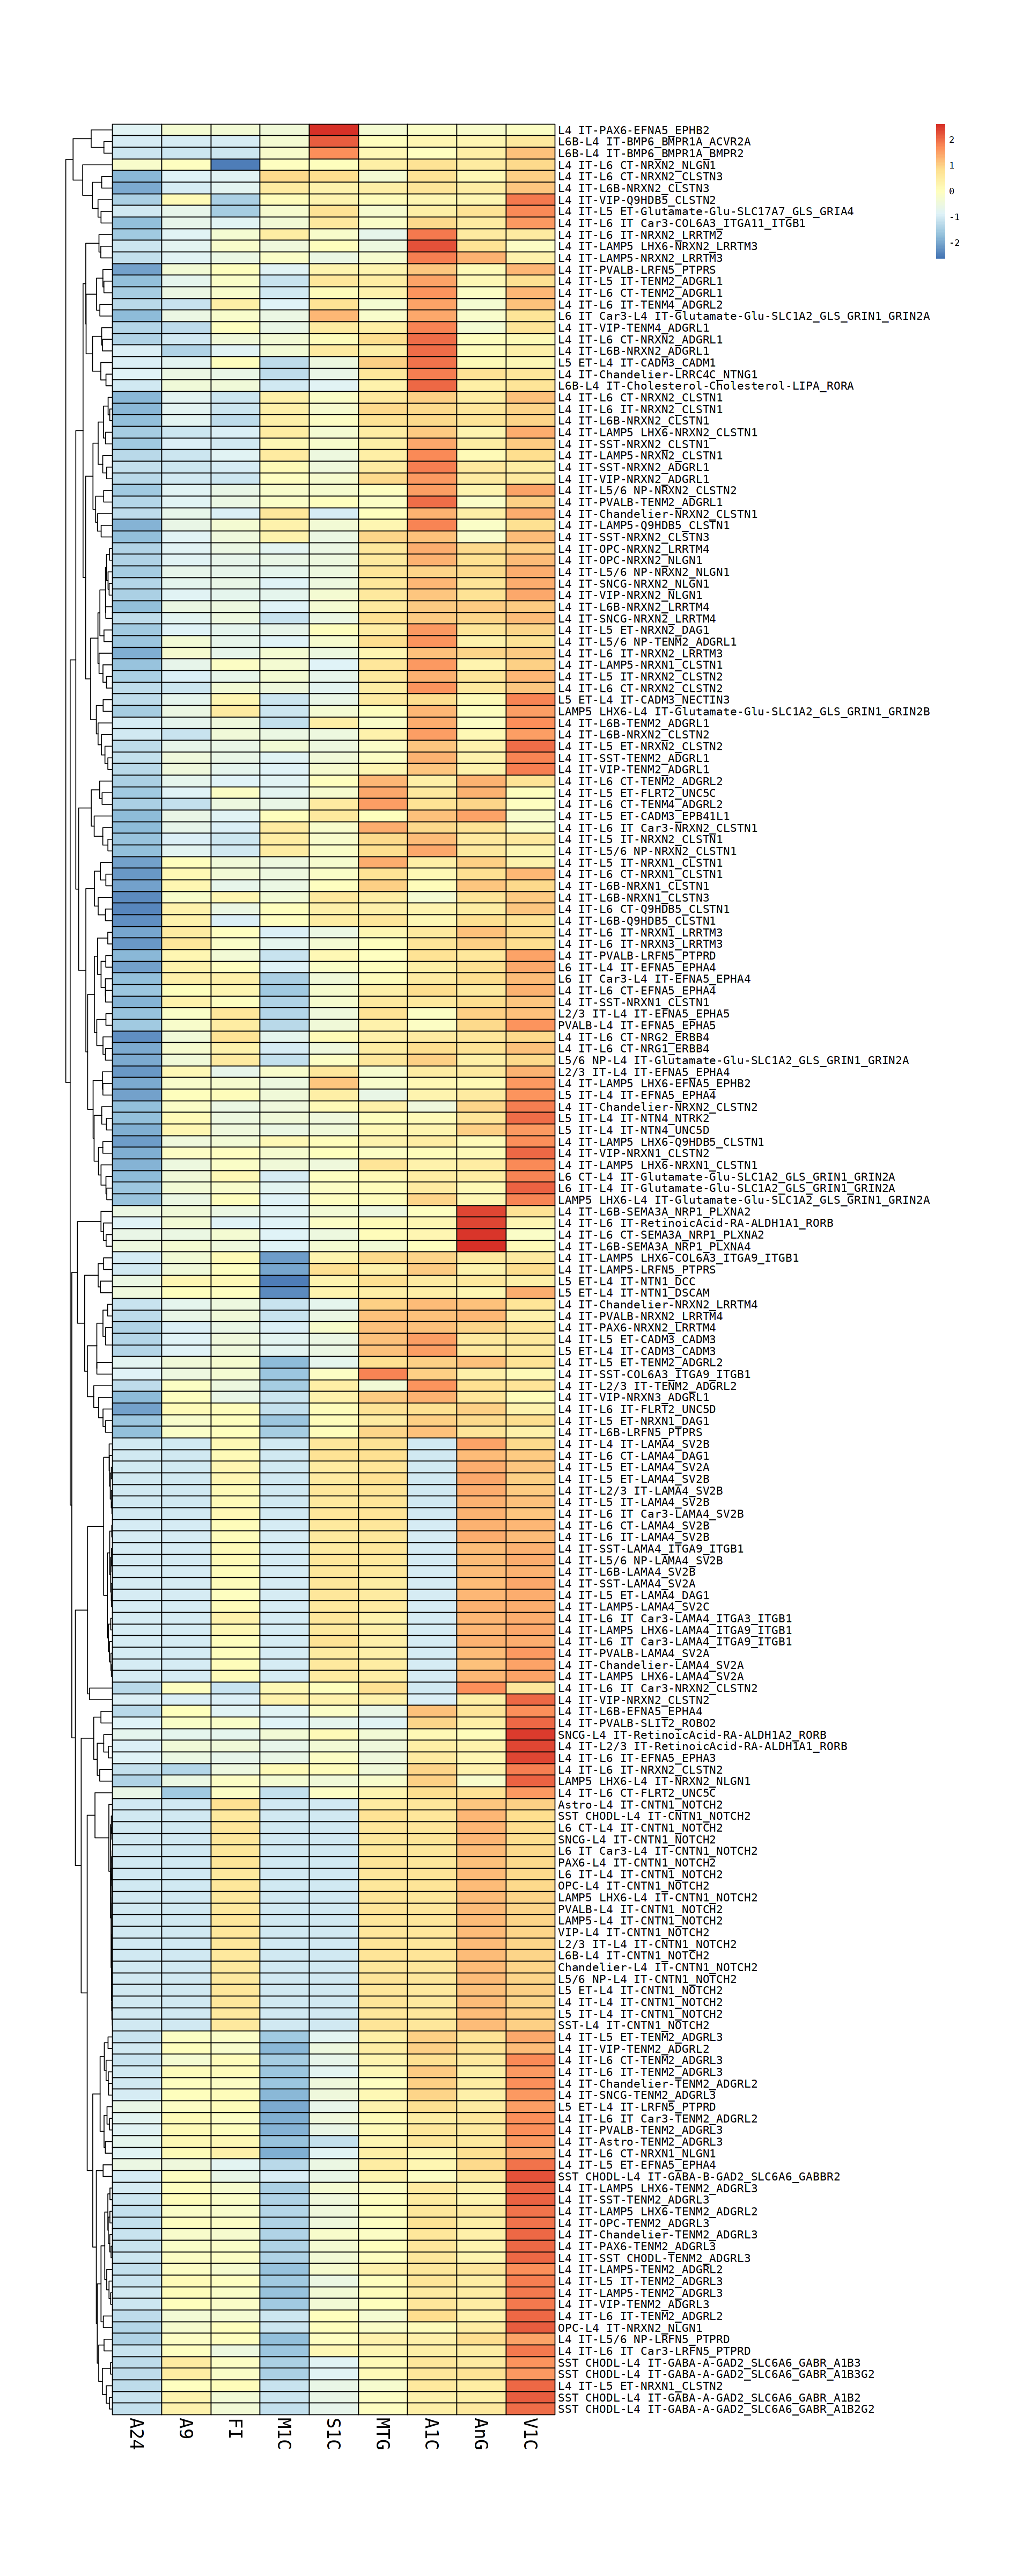

In [35]:
options(repr.plot.width = 16, repr.plot.height = 40)
p <- pheatmap(
    subclass_lr_table_expanded[rownames(cor_results[cor_results$correlation.rho > 0.7, ]), ],
    cluster_col = FALSE,
    scale = "row",
    border_color = "black",
    fontfamily = "mono",
    fontsize_row = 12.5,
    fontsize_col = 20,
    cellwidth = 55,
    cellheight = 13
)
ggsave(
    filename = sprintf("%s/L4_IT-cellchat-top2.png", figure_dir), 
    plot = p, 
    dpi = 300, 
    height = 40, 
    width = 16, 
    device = "png"
)

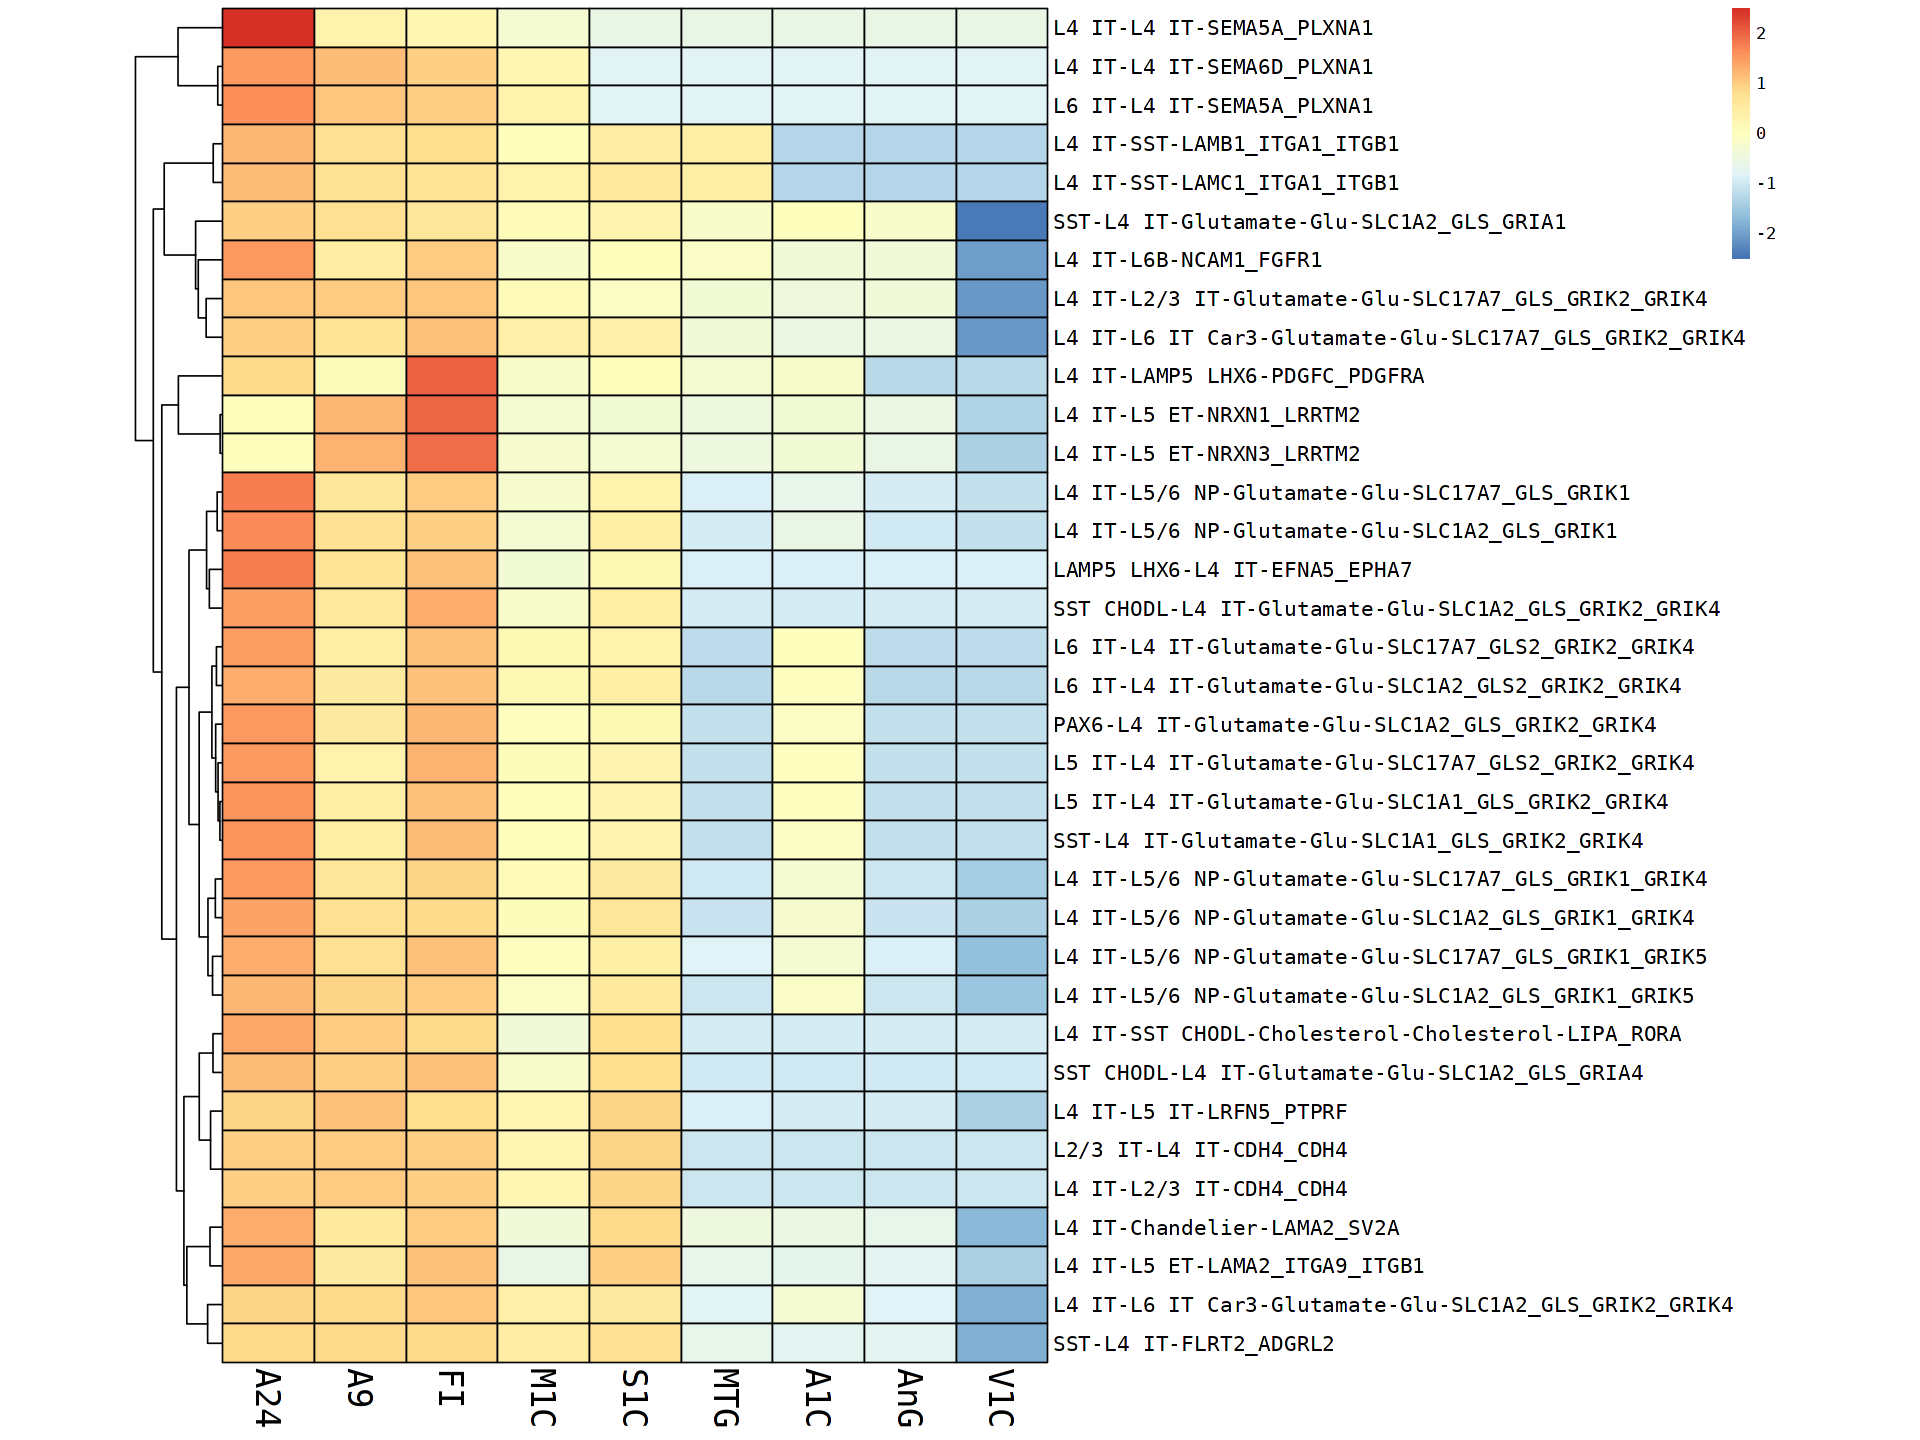

In [27]:
options(repr.plot.width = 16, repr.plot.height = 12)
pheatmap(
    subclass_lr_table_expanded[rownames(cor_results[cor_results$correlation.rho < -0.9, ]), ],
    cluster_col = FALSE,
    scale = "row",
    border_color = "black",
    fontfamily = "mono",
    fontsize_row = 12.5,
    fontsize_col = 20,
    cellwidth = 55
)

In [36]:
region_order <- c("A24", "A9", "FI", "M1C", "S1C", "MTG", "A1C", "AnG", "V1C")
subclass_order <- c(
    "L2/3 IT", "L4 IT", "L5 IT", "L6 IT", "L6 IT Car3", "L6 CT", "L5 ET", "L5/6 NP", "L6B",
    "PVALB", "LAMP5", "LAMP5 LHX6", "PAX6", "SNCG", "VIP", "SST", "SST CHODL", "Chandelier",
    "Oligo", "Astro", "Micro/PVM", "OPC", "Endo", "VLMC"
)

In [51]:
result_df <- data.frame(
    total_counts = rep(0.0, times = length(region_order) * length(subclass_order)),
    region = rep(region_order, each = length(subclass_order)),
    subclass = rep(subclass_order, times = length(region_order))
)
for (region in region_order) {
    for (subclass in subclass_order) {
        mat <- region_cc_objects[[region]]
        cct <- (mat@net$count[subclass, "Astro"] + mat@net$count["Astro", subclass]) / 2.0
        result_df[(result_df$region == region) & (result_df$subclass == subclass), "total_counts"] <- cct
    }
}
result_df$region <- factor(result_df$region, levels = region_order)
result_df$subclass <- factor(result_df$subclass, levels = subclass_order)

In [72]:
dartfish_result_df <- read.table(
    "../dartfish/proximity_analysis_Astro_200um_cleaned.csv", sep = ",", header = TRUE)
dartfish_result_df[dartfish_result_df$region == "ACC", "region"] <- "A24"
dartfish_result_df[dartfish_result_df$region == "DFC", "region"] <- "A9"

In [73]:
result_df <- result_df |>
    dplyr::group_by(region) |>
    dplyr::mutate(percent = total_counts / sum(total_counts)) |>
    dplyr::ungroup()

In [78]:
corr_scores <- vector(mode = "list", length = length(subclass_order))
names(corr_scores) <- subclass_order

for (subclass in subclass_order) {
    cc_df <- result_df[result_df$subclass == subclass, ]
    dartfish_df <- dartfish_result_df[dartfish_result_df$subclass == subclass, ]
    rownames(cc_df) <- cc_df$region
    rownames(dartfish_df) <- dartfish_df$region
    corr_scores[[subclass]] <- cor(cc_df[region_order, ]$percent, dartfish_df[region_order, ]$percent, method = "pearson")
}

In [82]:
corr_scores

$`L2/3 IT`
[1] -0.3853498

$`L4 IT`
[1] -0.3543309

$`L5 IT`
[1] -0.8909254

$`L6 IT`
[1] -0.2479523

$`L6 IT Car3`
[1] -0.2544533

$`L6 CT`
[1] 0.4767197

$`L5 ET`
[1] -0.7020579

$`L5/6 NP`
[1] 0.4070109

$L6B
[1] 0.3049682

$PVALB
[1] -0.3663898

$LAMP5
[1] -0.09318029

$`LAMP5 LHX6`
[1] -0.2575776

$PAX6
[1] -0.3120741

$SNCG
[1] -0.09113132

$VIP
[1] 0.4825523

$SST
[1] 0.004003922

$`SST CHODL`
[1] 0.326294

$Chandelier
[1] 0.2649788

$Oligo
[1] -0.4348642

$Astro
[1] 0.5764075

$`Micro/PVM`
[1] -0.3215688

$OPC
[1] -0.4240526

$Endo
[1] 0.4808734

$VLMC
[1] 0.2759715

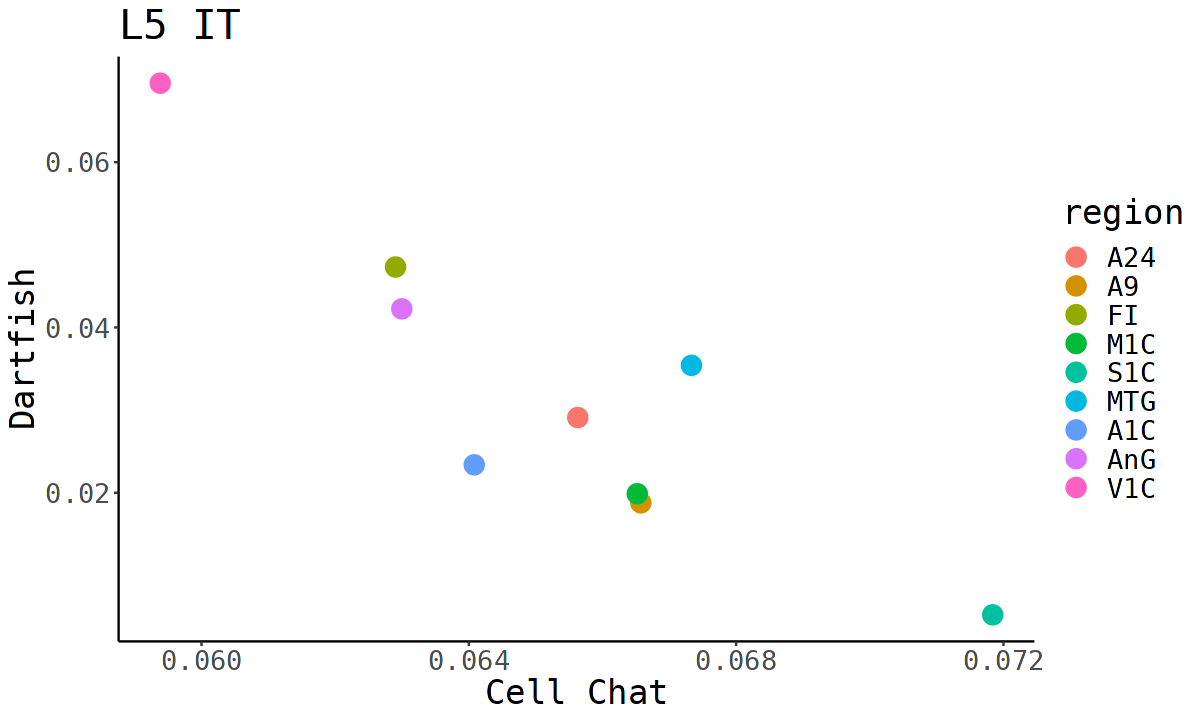

In [125]:
subclass <- "L5 IT"
cc_df <- result_df[result_df$subclass == subclass, c("region", "percent")]
dartfish_df <- dartfish_result_df[dartfish_result_df$subclass == subclass, c("region", "percent")]
plot_df <- merge(cc_df, dartfish_df, by = "region")
plot_df$region <- factor(plot_df$region, levels = region_order)

options(repr.plot.width = 10, repr.plot.height = 6)
p <- ggplot(plot_df, aes(x = percent.x, y = percent.y, color=region)) +
geom_point(size = 5) +
labs(
    title = subclass,
    x = "Cell Chat",
    y = "Dartfish"
)+
theme_classic() +
theme(
    text = element_text(family = "mono", size = 20)
)
ggsave(
    filename = sprintf("%s/%s-Astro-corr.png", figure_dir, "L5_IT"), 
    plot = p, 
    dpi = 300, 
    height = 6, 
    width = 10, 
    device = "png"
)
p

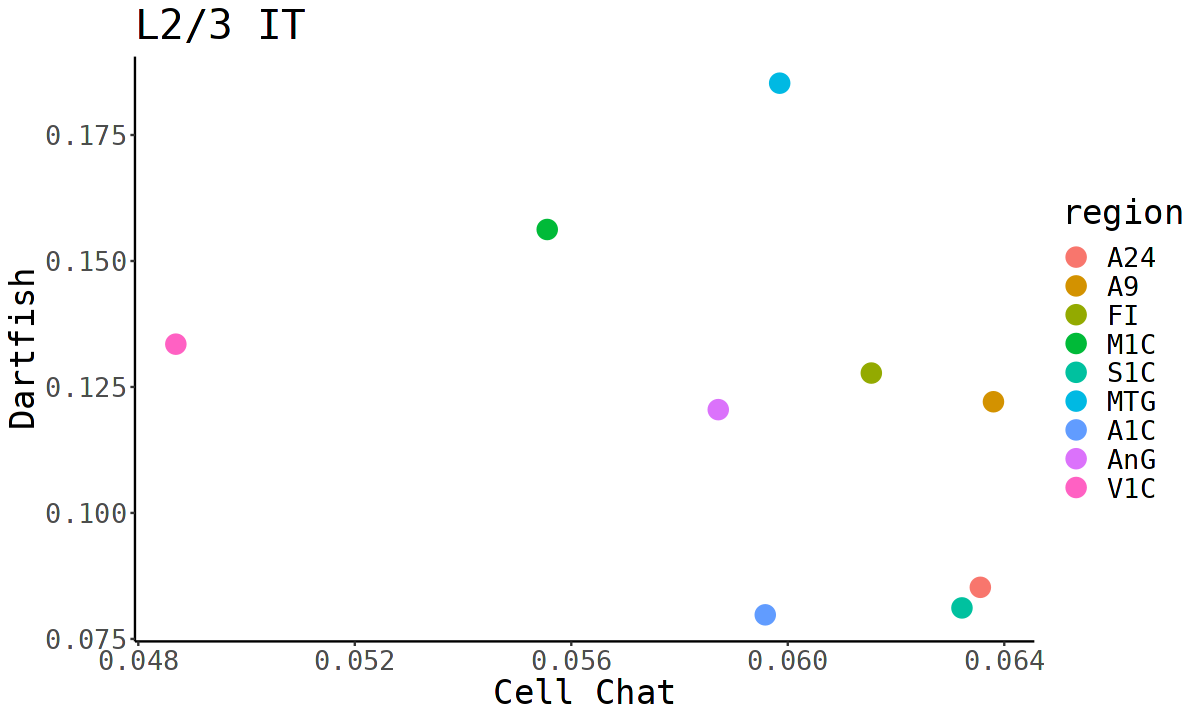

In [126]:
subclass <- "L2/3 IT"
cc_df <- result_df[result_df$subclass == subclass, c("region", "percent")]
dartfish_df <- dartfish_result_df[dartfish_result_df$subclass == subclass, c("region", "percent")]
plot_df <- merge(cc_df, dartfish_df, by = "region")
plot_df$region <- factor(plot_df$region, levels = region_order)

options(repr.plot.width = 10, repr.plot.height = 6)
p <- ggplot(plot_df, aes(x = percent.x, y = percent.y, color=region)) +
geom_point(size = 5) +
labs(
    title = subclass,
    x = "Cell Chat",
    y = "Dartfish"
)+
theme_classic() +
theme(
    text = element_text(family = "mono", size = 20)
)
ggsave(
    filename = sprintf("%s/%s-Astro-corr.png", figure_dir, "L2_3_IT"), 
    plot = p, 
    dpi = 300, 
    height = 6, 
    width = 10, 
    device = "png"
)
p

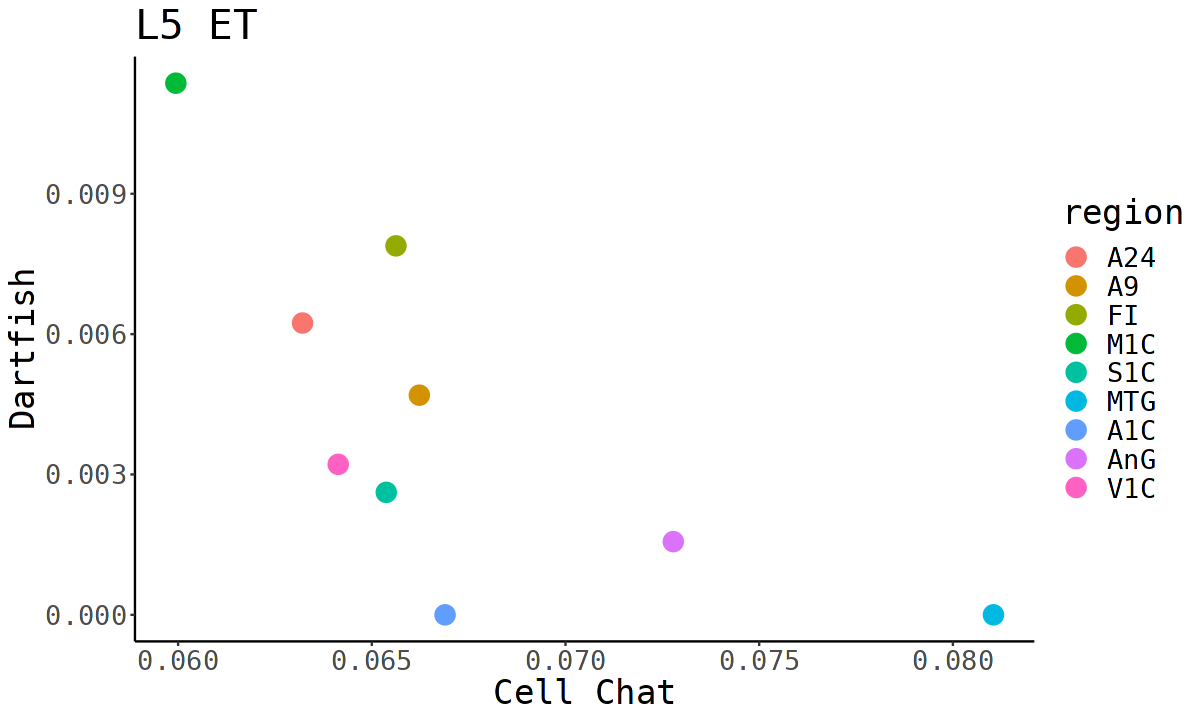

In [127]:
subclass <- "L5 ET"
cc_df <- result_df[result_df$subclass == subclass, c("region", "percent")]
dartfish_df <- dartfish_result_df[dartfish_result_df$subclass == subclass, c("region", "percent")]
plot_df <- merge(cc_df, dartfish_df, by = "region")
plot_df$region <- factor(plot_df$region, levels = region_order)

options(repr.plot.width = 10, repr.plot.height = 6)
p <- ggplot(plot_df, aes(x = percent.x, y = percent.y, color=region)) +
geom_point(size = 5) +
labs(
    title = subclass,
    x = "Cell Chat",
    y = "Dartfish"
)+
theme_classic() +
theme(
    text = element_text(family = "mono", size = 20)
)
ggsave(
    filename = sprintf("%s/%s-Astro-corr.png", figure_dir, "L5_ET"), 
    plot = p, 
    dpi = 300, 
    height = 6, 
    width = 10, 
    device = "png"
)
p

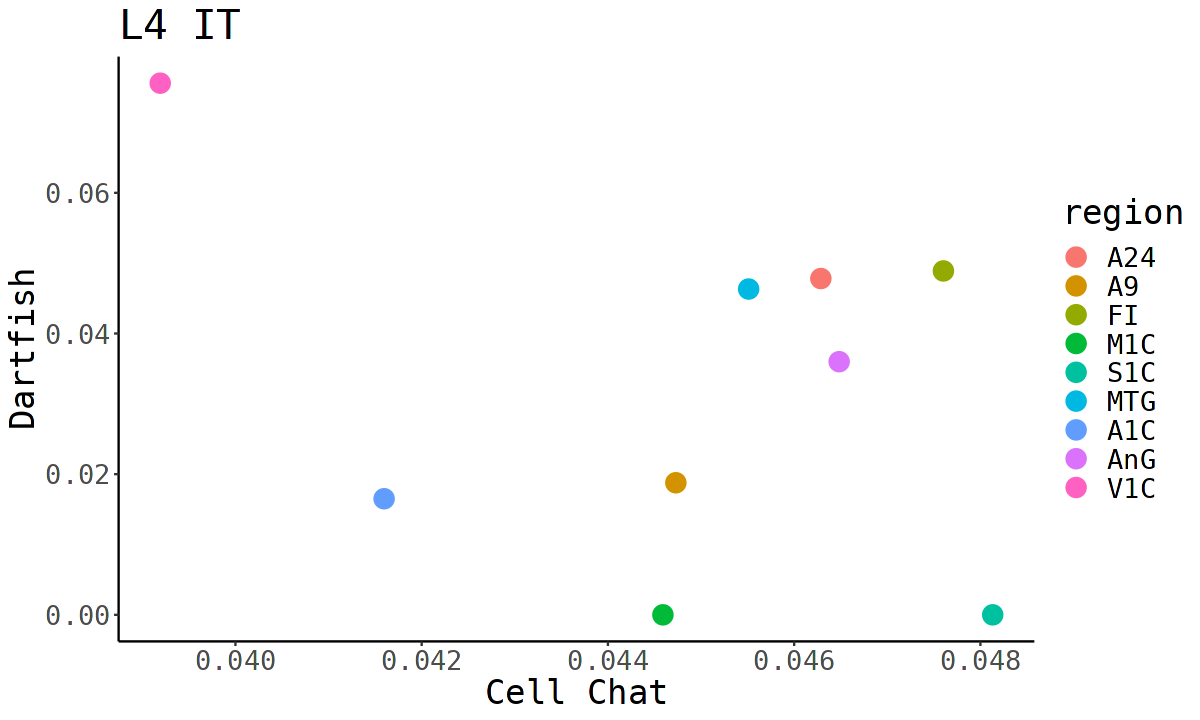

In [128]:
subclass <- "L4 IT"
cc_df <- result_df[result_df$subclass == subclass, c("region", "percent")]
dartfish_df <- dartfish_result_df[dartfish_result_df$subclass == subclass, c("region", "percent")]
plot_df <- merge(cc_df, dartfish_df, by = "region")
plot_df$region <- factor(plot_df$region, levels = region_order)

options(repr.plot.width = 10, repr.plot.height = 6)
p <- ggplot(plot_df, aes(x = percent.x, y = percent.y, color=region)) +
geom_point(size = 5) +
labs(
    title = subclass,
    x = "Cell Chat",
    y = "Dartfish"
)+
theme_classic() +
theme(
    text = element_text(family = "mono", size = 20)
)
ggsave(
    filename = sprintf("%s/%s-Astro-corr.png", figure_dir, "L4_IT"), 
    plot = p, 
    dpi = 300, 
    height = 6, 
    width = 10, 
    device = "png"
)
p